# Data Mining:
# Data Preprocessing, EDA & Basic Hypothesis Testing with NHANES Data

## Introduction

In this projetc, we will work with data from the National Health and Nutrition Examination Survey (NHANES), a program of studies designed to assess the health and nutritional status of adults and children in the United States. The NHANES dataset is collected by the Centers for Disease Control and Prevention (CDC) and provides a rich source of real-world health data.

Through this project, we have:
1. Data preprocessing techniques
2. Exploratory data analysis (EDA)
3. Basic hypothesis testing

We'll be using Python libraries including pandas, NumPy, matplotlib, seaborn, and scikit-learn to analyze the data.

## Setup

First, let's import the necessary libraries:

In [1]:
# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Statistical analysis
from scipy import stats

# Machine learning
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_classif

# Set plot style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('viridis')

# Display settings
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

## Part 1: Data Loading and Initial Exploration

For this project, we'll use a subset of the NHANES 2017-2018 data. The dataset includes demographic information, examination measurements (like blood pressure), and laboratory results (like cholesterol levels).

### 1.1 Loading the Data

First, let's download the necessary data files. We'll use three main components of the NHANES dataset:
1. Demographics data (DEMO_J.XPT)
2. Body Measurements data (BMX_J.XPT)
3. Blood Pressure data (BPX_J.XPT)

In [2]:
# Download NHANES data files
import os
import urllib.request

# Create data directory if it doesn't exist
os.makedirs('data', exist_ok=True)

# URLs for the NHANES 2017-2018 data files
urls = {
    'demographics': 'https://wwwn.cdc.gov/Nchs/Data/Nhanes/Public/2017/DataFiles/DEMO_J.xpt',
    'body_measurements': 'https://wwwn.cdc.gov/Nchs/Data/Nhanes/Public/2017/DataFiles/BMX_J.xpt',
    'blood_pressure': 'https://wwwn.cdc.gov/Nchs/Data/Nhanes/Public/2017/DataFiles/BPX_J.xpt'
}

# Download files if they don't exist
for name, url in urls.items():
    filename = os.path.join('data', os.path.basename(url))
    if not os.path.exists(filename):
        print(f"Downloading {name} data...")
        urllib.request.urlretrieve(url, filename)
        print(f"Downloaded {filename}")
    else:
        print(f"{filename} already exists")

Downloaded data\DEMO_J.xpt
Downloaded data\BMX_J.xpt
Downloaded data\BPX_J.xpt


In [4]:
# Load the datasets
demo_df = pd.read_sas('data/DEMO_J.XPT')
bmx_df = pd.read_sas('data/BMX_J.XPT')
bp_df = pd.read_sas('data/BPX_J.XPT')

print(f"Demographics data shape: {demo_df.shape}")
print(f"Body measurements data shape: {bmx_df.shape}")
print(f"Blood pressure data shape: {bp_df.shape}")

Demographics data shape: (9254, 46)
Body measurements data shape: (8704, 21)
Blood pressure data shape: (8704, 21)


### 1.2 Initial Data Exploration

Let's examine the structure and content of each dataset.

In [5]:
# Explore demographics data
print("\nDemographics Data:")
print("-------------------")
print(demo_df.info())
print("\nSample records:")
demo_df.head()


Demographics Data:
-------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9254 entries, 0 to 9253
Data columns (total 46 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SEQN      9254 non-null   float64
 1   SDDSRVYR  9254 non-null   float64
 2   RIDSTATR  9254 non-null   float64
 3   RIAGENDR  9254 non-null   float64
 4   RIDAGEYR  9254 non-null   float64
 5   RIDAGEMN  597 non-null    float64
 6   RIDRETH1  9254 non-null   float64
 7   RIDRETH3  9254 non-null   float64
 8   RIDEXMON  8704 non-null   float64
 9   RIDEXAGM  3433 non-null   float64
 10  DMQMILIZ  6004 non-null   float64
 11  DMQADFC   561 non-null    float64
 12  DMDBORN4  9254 non-null   float64
 13  DMDCITZN  9251 non-null   float64
 14  DMDYRSUS  1948 non-null   float64
 15  DMDEDUC3  2306 non-null   float64
 16  DMDEDUC2  5569 non-null   float64
 17  DMDMARTL  5569 non-null   float64
 18  RIDEXPRG  1110 non-null   float64
 19  SIALANG   9254 non-null   flo

,SEQN,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEYR,RIDAGEMN,RIDRETH1,RIDRETH3,RIDEXMON,RIDEXAGM,DMQMILIZ,DMQADFC,DMDBORN4,DMDCITZN,DMDYRSUS,DMDEDUC3,DMDEDUC2,DMDMARTL,RIDEXPRG,SIALANG,SIAPROXY,SIAINTRP,FIALANG,FIAPROXY,FIAINTRP,MIALANG,MIAPROXY,MIAINTRP,AIALANGA,DMDHHSIZ,DMDFMSIZ,DMDHHSZA,DMDHHSZB,DMDHHSZE,DMDHRGND,DMDHRAGZ,DMDHREDZ,DMDHRMAZ,DMDHSEDZ,WTINT2YR,WTMEC2YR,SDMVPSU,SDMVSTRA,INDHHIN2,INDFMIN2,INDFMPIR
0,93703.0,10.0,2.0,2.0,2.0,NaN,5.0,6.0,2.0,27.0,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,2.0,1.0,2.0,2.0,NaN,NaN,NaN,NaN,5.0,5.0,3.000000e+00,5.397605e-79,5.397605e-79,1.0,2.0,3.0,1.0,3.0,9246.491865,8539.731348,2.0,145.0,15.0,15.0,5.00
1,93704.0,10.0,2.0,1.0,2.0,NaN,3.0,3.0,1.0,33.0,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,2.0,1.0,2.0,2.0,NaN,NaN,NaN,NaN,4.0,4.0,2.000000e+00,5.397605e-79,5.397605e-79,1.0,2.0,3.0,1.0,2.0,37338.768343,42566.614750,1.0,143.0,15.0,15.0,5.00
2,93705.0,10.0,2.0,2.0,66.0,NaN,4.0,4.0,2.0,NaN,2.0,NaN,1.0,1.0,NaN,NaN,2.0,3.0,NaN,1.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,1.0,1.0,1.0,5.397605e-79,5.397605e-79,1.000000e+00,2.0,4.0,1.0,2.0,NaN,8614.571172,8338.419786,2.0,145.0,3.0,3.0,0.82
3,93706.0,10.0,2.0,1.0,18.0,NaN,5.0,6.0,2.0,222.0,2.0,NaN,1.0,1.0,NaN,15.0,NaN,NaN,NaN,1.0,2.0,2.0,NaN,NaN,NaN,1.0,2.0,2.0,1.0,5.0,5.0,5.397605e-79,5.397605e-79,1.000000e+00,1.0,4.0,3.0,1.0,2.0,8548.632619,8723.439814,2.0,134.0,NaN,NaN,NaN
4,93707.0,10.0,2.0,1.0,13.0,NaN,5.0,7.0,2.0,158.0,NaN,NaN,1.0,1.0,NaN,6.0,NaN,NaN,NaN,1.0,1.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,1.0,7.0,7.0,5.397605e-79,3.000000e+00,5.397605e-79,1.0,3.0,2.0,1.0,3.0,6769.344567,7064.609730,1.0,138.0,10.0,10.0,1.88


In [6]:
# Explore body measurements data
print("\nBody Measurements Data:")
print("------------------------")
print(bmx_df.info())
print("\nSample records:")
bmx_df.head()


Body Measurements Data:
------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8704 entries, 0 to 8703
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SEQN      8704 non-null   float64
 1   BMDSTATS  8704 non-null   float64
 2   BMXWT     8580 non-null   float64
 3   BMIWT     416 non-null    float64
 4   BMXRECUM  894 non-null    float64
 5   BMIRECUM  24 non-null     float64
 6   BMXHEAD   194 non-null    float64
 7   BMIHEAD   0 non-null      float64
 8   BMXHT     8016 non-null   float64
 9   BMIHT     99 non-null     float64
 10  BMXBMI    8005 non-null   float64
 11  BMXLEG    6703 non-null   float64
 12  BMILEG    334 non-null    float64
 13  BMXARML   8177 non-null   float64
 14  BMIARML   347 non-null    float64
 15  BMXARMC   8173 non-null   float64
 16  BMIARMC   350 non-null    float64
 17  BMXWAIST  7601 non-null   float64
 18  BMIWAIST  437 non-null    float64
 19  BMXHIP    6039 non-

,SEQN,BMDSTATS,BMXWT,BMIWT,BMXRECUM,BMIRECUM,BMXHEAD,BMIHEAD,BMXHT,BMIHT,BMXBMI,BMXLEG,BMILEG,BMXARML,BMIARML,BMXARMC,BMIARMC,BMXWAIST,BMIWAIST,BMXHIP,BMIHIP
0,93703.0,1.0,13.7,3.0,89.6,NaN,NaN,NaN,88.6,NaN,17.5,NaN,NaN,18.0,NaN,16.2,NaN,48.2,NaN,NaN,NaN
1,93704.0,1.0,13.9,NaN,95.0,NaN,NaN,NaN,94.2,NaN,15.7,NaN,NaN,18.6,NaN,15.2,NaN,50.0,NaN,NaN,NaN
2,93705.0,1.0,79.5,NaN,NaN,NaN,NaN,NaN,158.3,NaN,31.7,37.0,NaN,36.0,NaN,32.0,NaN,101.8,NaN,110.0,NaN
3,93706.0,1.0,66.3,NaN,NaN,NaN,NaN,NaN,175.7,NaN,21.5,46.6,NaN,38.8,NaN,27.0,NaN,79.3,NaN,94.4,NaN
4,93707.0,1.0,45.4,NaN,NaN,NaN,NaN,NaN,158.4,NaN,18.1,38.1,NaN,33.8,NaN,21.5,NaN,64.1,NaN,83.0,NaN


In [7]:
# Explore blood pressure data
bmx_df.describe()

,SEQN,BMDSTATS,BMXWT,BMIWT,BMXRECUM,BMIRECUM,BMXHEAD,BMIHEAD,BMXHT,BMIHT,BMXBMI,BMXLEG,BMILEG,BMXARML,BMIARML,BMXARMC,BMIARMC,BMXWAIST,BMIWAIST,BMXHIP,BMIHIP
count,8704.000000,8704.000000,8580.000000,416.000000,894.000000,24.0,194.000000,0.0,8016.000000,99.000000,8005.000000,6703.000000,334.0,8177.000000,347.0,8173.000000,350.0,7601.000000,437.0,6039.000000,270.0
mean,98315.452091,1.135800,65.138508,3.002404,81.089262,1.0,40.932474,NaN,156.593401,2.353535,26.577502,38.643980,1.0,33.667996,1.0,29.193589,1.0,89.928851,1.0,105.281868,1.0
std,2669.112899,0.506137,32.890754,0.401796,14.485755,0.0,2.635062,NaN,22.257858,0.940182,8.260724,4.158013,0.0,7.229185,0.0,7.970648,0.0,22.805093,0.0,14.848187,0.0
min,93703.000000,1.000000,3.200000,1.000000,49.100000,1.0,32.400000,NaN,78.300000,1.000000,12.300000,24.800000,1.0,9.400000,1.0,11.200000,1.0,40.000000,1.0,66.600000,1.0
25%,96000.750000,1.000000,43.100000,3.000000,69.900000,1.0,38.925000,NaN,151.400000,1.000000,20.400000,35.800000,1.0,32.000000,1.0,23.800000,1.0,73.900000,1.0,95.200000,1.0
50%,98308.500000,1.000000,67.750000,3.000000,82.000000,1.0,41.050000,NaN,161.900000,3.000000,25.800000,38.800000,1.0,35.800000,1.0,30.100000,1.0,91.200000,1.0,103.100000,1.0
75%,100625.250000,1.000000,85.600000,3.000000,92.700000,1.0,42.700000,NaN,171.200000,3.000000,31.300000,41.500000,1.0,38.400000,1.0,34.700000,1.0,105.300000,1.0,112.700000,1.0
max,102956.000000,4.000000,242.600000,4.000000,111.300000,1.0,47.900000,NaN,197.700000,3.000000,86.200000,55.000000,1.0,49.900000,1.0,56.300000,1.0,169.500000,1.0,179.000000,1.0


### 1.3 Understanding the Variables

Let's identify the key variables in each dataset:

**Demographics (DEMO_J):**
- SEQN: Respondent sequence number (unique identifier)
- RIAGENDR: Gender (1=Male, 2=Female)
- RIDAGEYR: Age in years
- RIDRETH3: Race/Hispanic origin
- DMDEDUC2: Education level (adults 20+)
- INDHHIN2: Annual household income

**Body Measurements (BMX_J):**
- SEQN: Respondent sequence number
- BMXWT: Weight (kg)
- BMXHT: Standing height (cm)
- BMXBMI: Body Mass Index (kg/m²)
- BMXWAIST: Waist circumference (cm)

**Blood Pressure (BPX_J):**
- SEQN: Respondent sequence number
- BPXSY1, BPXSY2, BPXSY3: Systolic blood pressure readings (mmHg)
- BPXDI1, BPXDI2, BPXDI3: Diastolic blood pressure readings (mmHg)

Now, let's merge these datasets to create a single dataset for our analysis.

In [8]:
# Merge the datasets on SEQN (respondent ID)
# First, merge demographics and body measurements
merged_df = pd.merge(demo_df, bmx_df, on='SEQN', how='inner')

# Then, merge with blood pressure data
merged_df = pd.merge(merged_df, bp_df, on='SEQN', how='inner')

print(f"Merged dataset shape: {merged_df.shape}")
print(f"Number of unique respondents: {merged_df['SEQN'].nunique()}")

# Display the first few rows of the merged dataset
merged_df.head()

Merged dataset shape: (8704, 86)
Number of unique respondents: 8704


,SEQN,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEYR,RIDAGEMN,RIDRETH1,RIDRETH3,RIDEXMON,RIDEXAGM,DMQMILIZ,DMQADFC,DMDBORN4,DMDCITZN,DMDYRSUS,DMDEDUC3,DMDEDUC2,DMDMARTL,RIDEXPRG,SIALANG,SIAPROXY,SIAINTRP,FIALANG,FIAPROXY,FIAINTRP,MIALANG,MIAPROXY,MIAINTRP,AIALANGA,DMDHHSIZ,DMDFMSIZ,DMDHHSZA,DMDHHSZB,DMDHHSZE,DMDHRGND,DMDHRAGZ,DMDHREDZ,DMDHRMAZ,DMDHSEDZ,WTINT2YR,WTMEC2YR,SDMVPSU,SDMVSTRA,INDHHIN2,INDFMIN2,INDFMPIR,BMDSTATS,BMXWT,BMIWT,BMXRECUM,BMIRECUM,BMXHEAD,BMIHEAD,BMXHT,BMIHT,BMXBMI,BMXLEG,BMILEG,BMXARML,BMIARML,BMXARMC,BMIARMC,BMXWAIST,BMIWAIST,BMXHIP,BMIHIP,PEASCCT1,BPXCHR,BPAARM,BPACSZ,BPXPLS,BPXPULS,BPXPTY,BPXML1,BPXSY1,BPXDI1,BPAEN1,BPXSY2,BPXDI2,BPAEN2,BPXSY3,BPXDI3,BPAEN3,BPXSY4,BPXDI4,BPAEN4
0,93703.0,10.0,2.0,2.0,2.0,NaN,5.0,6.0,2.0,27.0,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,2.0,1.0,2.0,2.0,NaN,NaN,NaN,NaN,5.0,5.0,3.000000e+00,5.397605e-79,5.397605e-79,1.0,2.0,3.0,1.0,3.0,9246.491865,8539.731348,2.0,145.0,15.0,15.0,5.00,1.0,13.7,3.0,89.6,NaN,NaN,NaN,88.6,NaN,17.5,NaN,NaN,18.0,NaN,16.2,NaN,48.2,NaN,NaN,NaN,NaN,120.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,93704.0,10.0,2.0,1.0,2.0,NaN,3.0,3.0,1.0,33.0,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,2.0,1.0,2.0,2.0,NaN,NaN,NaN,NaN,4.0,4.0,2.000000e+00,5.397605e-79,5.397605e-79,1.0,2.0,3.0,1.0,2.0,37338.768343,42566.614750,1.0,143.0,15.0,15.0,5.00,1.0,13.9,NaN,95.0,NaN,NaN,NaN,94.2,NaN,15.7,NaN,NaN,18.6,NaN,15.2,NaN,50.0,NaN,NaN,NaN,NaN,114.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,93705.0,10.0,2.0,2.0,66.0,NaN,4.0,4.0,2.0,NaN,2.0,NaN,1.0,1.0,NaN,NaN,2.0,3.0,NaN,1.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,1.0,1.0,1.0,5.397605e-79,5.397605e-79,1.000000e+00,2.0,4.0,1.0,2.0,NaN,8614.571172,8338.419786,2.0,145.0,3.0,3.0,0.82,1.0,79.5,NaN,NaN,NaN,NaN,NaN,158.3,NaN,31.7,37.0,NaN,36.0,NaN,32.0,NaN,101.8,NaN,110.0,NaN,NaN,NaN,1.0,4.0,52.0,1.0,1.0,220.0,NaN,NaN,NaN,NaN,NaN,NaN,202.0,62.0,2.0,198.0,74.0,2.0
3,93706.0,10.0,2.0,1.0,18.0,NaN,5.0,6.0,2.0,222.0,2.0,NaN,1.0,1.0,NaN,15.0,NaN,NaN,NaN,1.0,2.0,2.0,NaN,NaN,NaN,1.0,2.0,2.0,1.0,5.0,5.0,5.397605e-79,5.397605e-79,1.000000e+00,1.0,4.0,3.0,1.0,2.0,8548.632619,8723.439814,2.0,134.0,NaN,NaN,NaN,1.0,66.3,NaN,NaN,NaN,NaN,NaN,175.7,NaN,21.5,46.6,NaN,38.8,NaN,27.0,NaN,79.3,NaN,94.4,NaN,NaN,NaN,1.0,3.0,82.0,1.0,1.0,140.0,112.0,74.0,2.0,114.0,70.0,2.0,108.0,76.0,2.0,NaN,NaN,NaN
4,93707.0,10.0,2.0,1.0,13.0,NaN,5.0,7.0,2.0,158.0,NaN,NaN,1.0,1.0,NaN,6.0,NaN,NaN,NaN,1.0,1.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,1.0,7.0,7.0,5.397605e-79,3.000000e+00,5.397605e-79,1.0,3.0,2.0,1.0,3.0,6769.344567,7064.609730,1.0,138.0,10.0,10.0,1.88,1.0,45.4,NaN,NaN,NaN,NaN,NaN,158.4,NaN,18.1,38.1,NaN,33.8,NaN,21.5,NaN,64.1,NaN,83.0,NaN,NaN,NaN,1.0,2.0,100.0,1.0,1.0,140.0,128.0,38.0,2.0,128.0,46.0,2.0,128.0,58.0,2.0,NaN,NaN,NaN


### 1.4 Selecting Variables of Interest

Let's select a subset of variables that are most relevant for our analysis:

In [10]:
# Select variables of interest
selected_vars = [
    'SEQN',          # Respondent ID
    'RIAGENDR',      # Gender
    'RIDAGEYR',      # Age in years
    'RIDRETH3',      # Race/Hispanic origin
    'DMDEDUC2',      # Education level (adults 20+)
    'INDHHIN2',      # Annual household income
    'BMXWT',         # Weight (kg)
    'BMXHT',         # Standing height (cm)
    'BMXBMI',        # Body Mass Index (kg/m²)
    'BMXWAIST',      # Waist circumference (cm)
    'BPXSY1',        # Systolic BP, reading 1
    'BPXSY2',        # Systolic BP, reading 2
    'BPXSY3',        # Systolic BP, reading 3
    'BPXDI1',        # Diastolic BP, reading 1
    'BPXDI2',        # Diastolic BP, reading 2
    'BPXDI3'         # Diastolic BP, reading 3
]

# Create a new DataFrame with selected variables
df = merged_df[selected_vars].copy()

# Display the first few rows
df.head() 

,SEQN,RIAGENDR,RIDAGEYR,RIDRETH3,DMDEDUC2,INDHHIN2,BMXWT,BMXHT,BMXBMI,BMXWAIST,BPXSY1,BPXSY2,BPXSY3,BPXDI1,BPXDI2,BPXDI3
0,93703.0,2.0,2.0,6.0,NaN,15.0,13.7,88.6,17.5,48.2,NaN,NaN,NaN,NaN,NaN,NaN
1,93704.0,1.0,2.0,3.0,NaN,15.0,13.9,94.2,15.7,50.0,NaN,NaN,NaN,NaN,NaN,NaN
2,93705.0,2.0,66.0,4.0,2.0,3.0,79.5,158.3,31.7,101.8,NaN,NaN,202.0,NaN,NaN,62.0
3,93706.0,1.0,18.0,6.0,NaN,NaN,66.3,175.7,21.5,79.3,112.0,114.0,108.0,74.0,70.0,76.0
4,93707.0,1.0,13.0,7.0,NaN,10.0,45.4,158.4,18.1,64.1,128.0,128.0,128.0,38.0,46.0,58.0


## Part 2: Data Preprocessing

Now that we have our dataset, let's preprocess it to address data quality issues and prepare it for analysis.

### 2.1 Handling Missing Values

First, let's check for missing values in our dataset:

In [11]:
# Check for missing values
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

# Create a DataFrame to display missing value information
missing_info = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentage
})

# Sort by percentage of missing values (descending)
missing_info = missing_info.sort_values('Percentage', ascending=False)

# Display variables with missing values
missing_info[missing_info['Missing Values'] > 0]

,Missing Values,Percentage
DMDEDUC2,3439,39.510570
BPXSY1,2402,27.596507
BPXDI1,2402,27.596507
BPXSY3,2166,24.885110
BPXDI3,2166,24.885110
BPXSY2,2141,24.597886
BPXDI2,2141,24.597886
BMXWAIST,1103,12.672335
BMXBMI,699,8.030790
BMXHT,688,7.904412


Let's visualize the missing values to better understand their patterns:

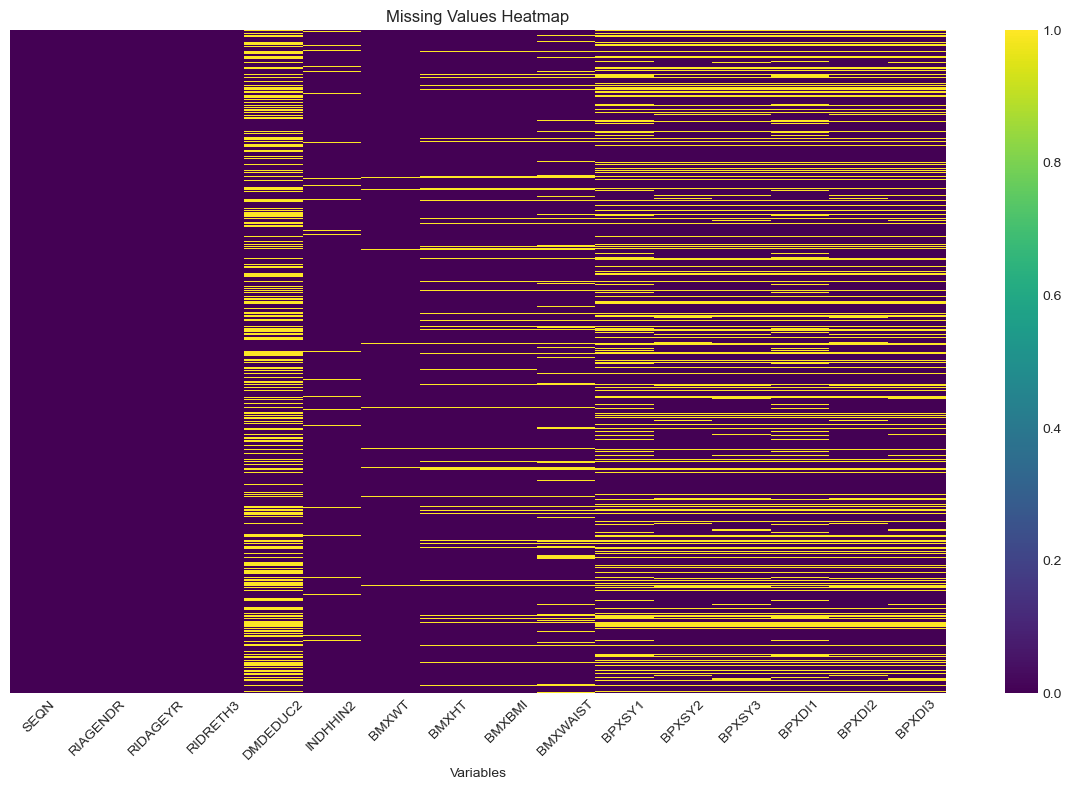

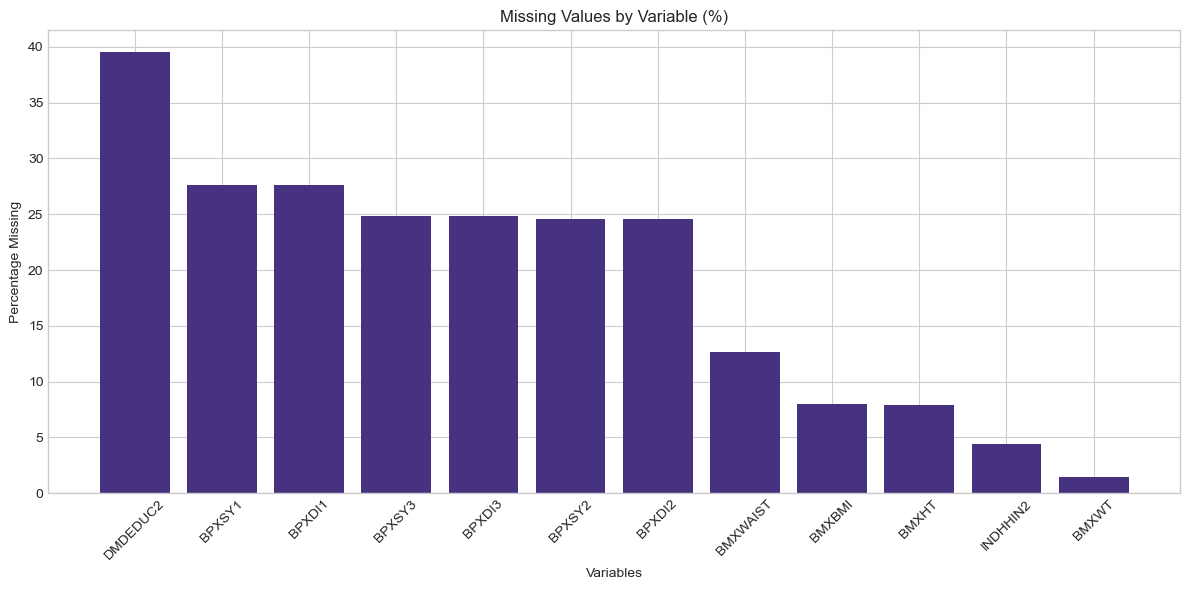

In [ ]:
# Visualize missing values
# Create a heatmap to visualize missing values
plt.figure(figsize=(12, 8))

# Create a matrix where True indicates missing values
missing_matrix = df.isnull()

# Plot heatmap
sns.heatmap(missing_matrix, cbar=True, cmap='viridis', yticklabels=False)
plt.title('Missing Values Heatmap')
plt.xlabel('Variables')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Create a bar plot of missing value percentages
plt.figure(figsize=(12, 6))
variables_with_missing = missing_info[missing_info['Missing Values'] > 0]
plt.bar(variables_with_missing.index, variables_with_missing['Percentage'])
plt.title('Missing Values by Variable (%)')
plt.xlabel('Variables')
plt.ylabel('Percentage Missing')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Exercise 1: Handling Missing Values

Now, let's handle the missing values in our dataset. We'll use different strategies based on the variable and the extent of missingness:

1. For variables with a small percentage of missing values (<5%), we'll use imputation.
2. For variables with a large percentage of missing values (>20%), we'll consider dropping them.
3. For variables with moderate missingness (5-20%), we'll make a decision based on their importance.

In [ ]:
# Step 1: Identify variables to drop (high missingness)
high_missing = missing_info[missing_info['Percentage'] > 20].index.tolist()
print(f"Variables with high missingness (>20%): {high_missing}")

# Step 2: Identify variables with moderate missingness (5-20%)
moderate_missing = missing_info[(missing_info['Percentage'] >= 5) & (missing_info['Percentage'] <= 20)].index.tolist()
print(f"Variables with moderate missingness (5-20%): {moderate_missing}")


# Step 3: Identify variables with low missingness (<5%)
low_missing = missing_info[(missing_info['Percentage'] > 0) & (missing_info['Percentage'] < 5)].index.tolist()
print(f"Variables with low missingness (<5%): {low_missing}")


# Step 4: Implement your missing value handling strategy
# Example solution (you should modify this based on your analysis):

# Create a copy of the DataFrame to work with
df_clean = df.copy()

# Drop variables with high missingness if they're not critical
# For this example, we'll keep all variables but you might decide to drop some

# Handle categorical variables (use mode imputation)
categorical_vars = ['RIAGENDR', 'RIDRETH3', 'DMDEDUC2', 'INDHHIN2']
for var in categorical_vars:
    if var in low_missing or var in moderate_missing or var in high_missing:
        # Impute with mode
        mode_value = df_clean[var].mode()[0]
        df_clean[var].fillna(mode_value, inplace=True)
        print(f"Imputed {var} with mode: {mode_value}")



# Handle numerical variables (use median imputation for simplicity)
numerical_vars = ['RIDAGEYR', 'BMXWT', 'BMXHT', 'BMXBMI', 'BMXWAIST', 
                  'BPXSY1', 'BPXSY2', 'BPXSY3', 'BPXDI1', 'BPXDI2', 'BPXDI3']
for var in numerical_vars:
    if var in low_missing or var in moderate_missing or var in high_missing:
        # Impute with median
        median_value = df_clean[var].median()
        df_clean[var].fillna(median_value, inplace=True)
        print(f"Imputed {var} with median: {median_value:.2f}")


# Check if we've handled all missing values
remaining_missing = df_clean.isnull().sum().sum()
print(f"\nRemaining missing values: {remaining_missing}")

Variables with high missingness (>20%): ['DMDEDUC2', 'BPXSY1', 'BPXDI1', 'BPXSY3', 'BPXDI3', 'BPXSY2', 'BPXDI2']
Variables with moderate missingness (5-20%): ['BMXWAIST', 'BMXBMI', 'BMXHT']
Variables with low missingness (<5%): ['INDHHIN2', 'BMXWT']
Imputed DMDEDUC2 with mode: 4.0
Imputed INDHHIN2 with mode: 15.0
Imputed BMXWT with median: 67.75
Imputed BMXHT with median: 161.90
Imputed BMXBMI with median: 25.80
Imputed BMXWAIST with median: 91.20
Imputed BPXSY1 with median: 118.00
Imputed BPXSY2 with median: 118.00
Imputed BPXSY3 with median: 118.00
Imputed BPXDI1 with median: 70.00
Imputed BPXDI2 with median: 70.00
Imputed BPXDI3 with median: 70.00

Remaining missing values: 0


C:\Users\dorsa\AppData\Local\Temp\ipykernel_23600\2970743861.py:33: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean[var].fillna(mode_value, inplace=True)
C:\Users\dorsa\AppData\Local\Temp\ipykernel_23600\2970743861.py:45: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

### 2.2 Handling Outliers

Next, let's check for outliers in our numerical variables:

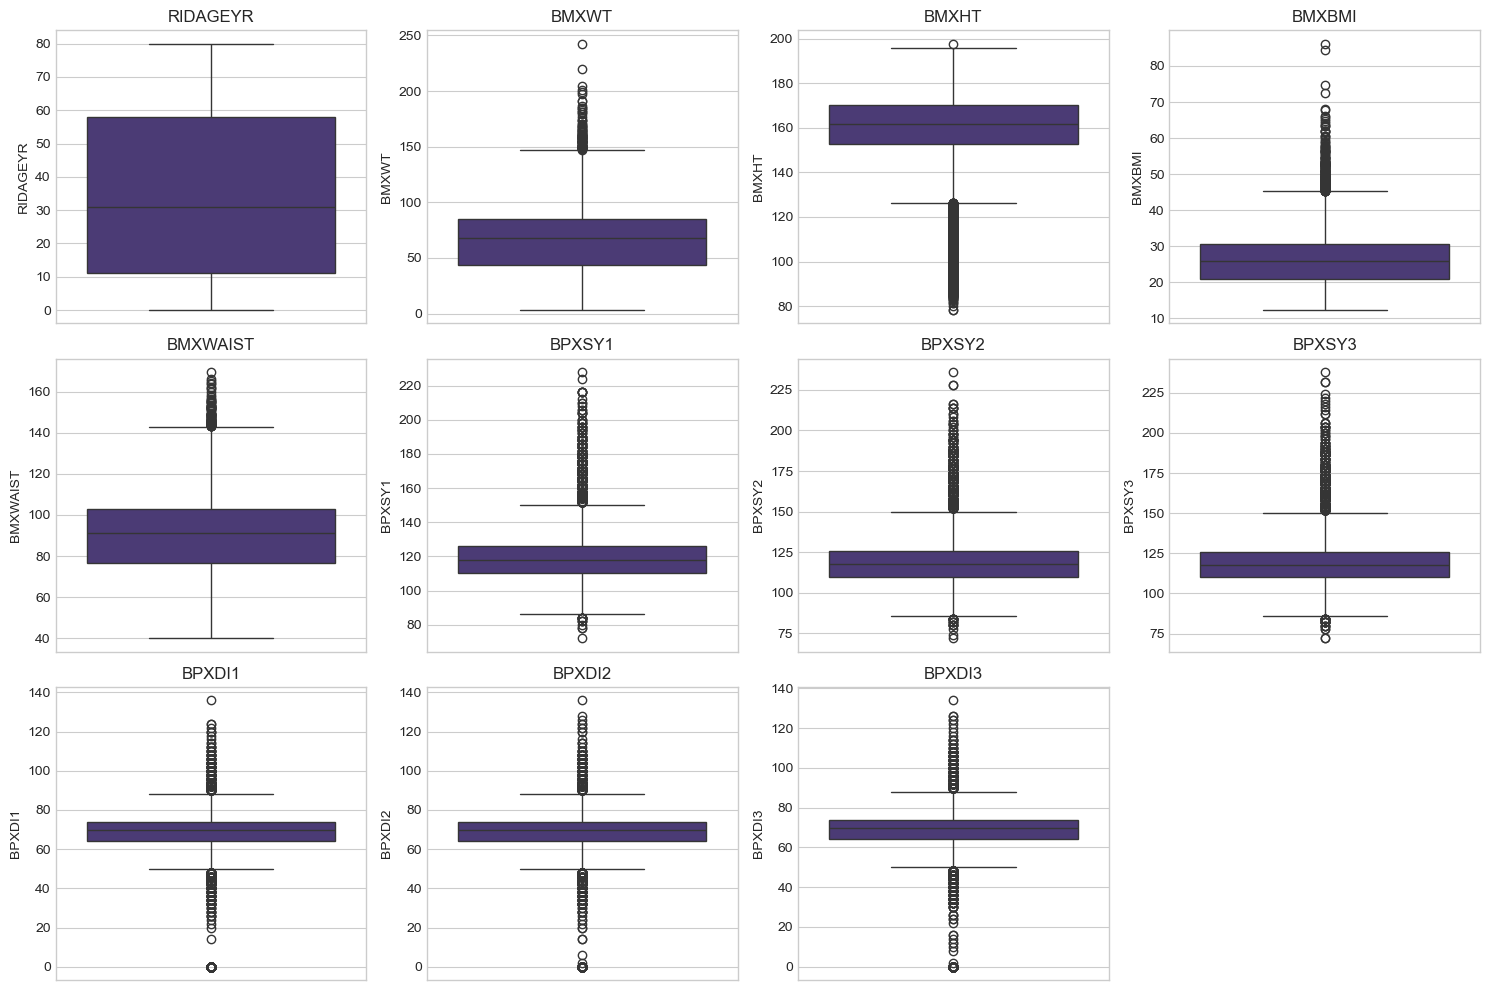

In [18]:
# Visualize distributions and potential outliers using box plots
numerical_vars = ['RIDAGEYR', 'BMXWT', 'BMXHT', 'BMXBMI', 'BMXWAIST', 
                  'BPXSY1', 'BPXSY2', 'BPXSY3', 'BPXDI1', 'BPXDI2', 'BPXDI3']

# Create box plots for numerical variables
plt.figure(figsize=(15, 10))
for i, var in enumerate(numerical_vars):
    plt.subplot(3, 4, i+1)
    sns.boxplot(y=df_clean[var])
    plt.title(var)
plt.tight_layout()
plt.show()

Let's also look at the distributions of these variables:

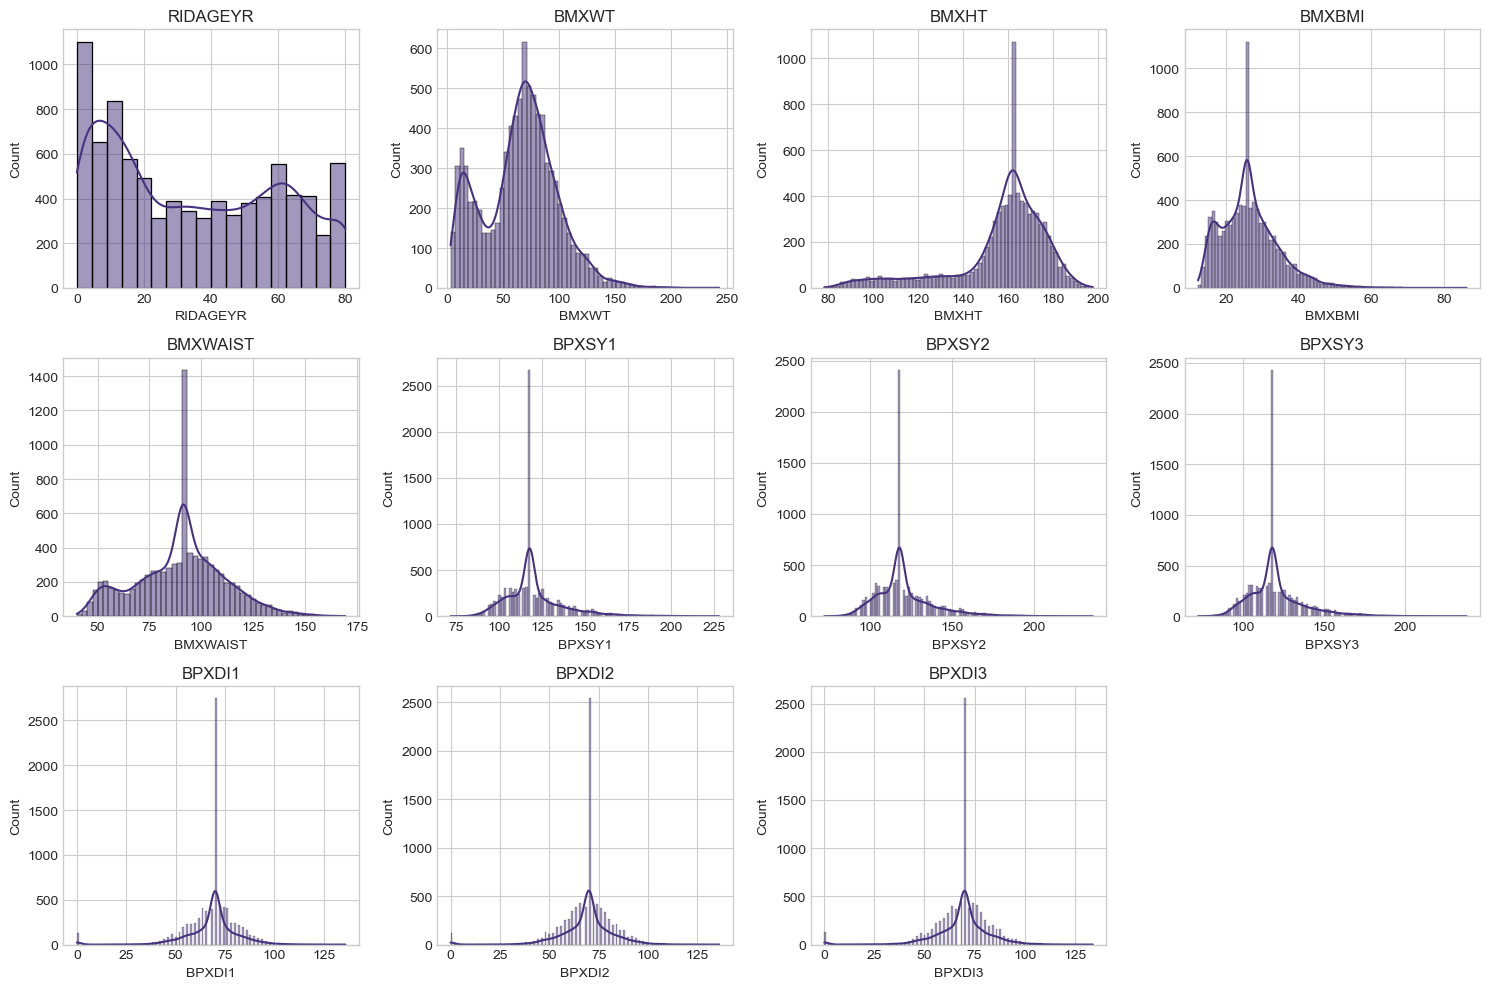

In [19]:
# Create histograms for numerical variables
plt.figure(figsize=(15, 10))
for i, var in enumerate(numerical_vars):
    plt.subplot(3, 4, i+1)
    sns.histplot(df_clean[var], kde=True)
    plt.title(var)
plt.tight_layout()
plt.show()

####  Handling Outliers

Now, let's handle the outliers in our dataset. We'll use the Tukey method (IQR method) to identify outliers and then apply winsorization to cap extreme values.

BMXWT: 87 outliers (1.00%)
  - Lower bound: -18.20
  - Upper bound: 147.40
BMXHT: 953 outliers (10.95%)
  - Lower bound: 126.30
  - Upper bound: 196.70
BMXBMI: 198 outliers (2.27%)
  - Lower bound: 6.45
  - Upper bound: 45.25
BMXWAIST: 87 outliers (1.00%)
  - Lower bound: 37.04
  - Upper bound: 142.74
BPXSY1: 561 outliers (6.45%)
  - Lower bound: 86.00
  - Upper bound: 150.00
BPXSY2: 616 outliers (7.08%)
  - Lower bound: 86.00
  - Upper bound: 150.00
BPXSY3: 592 outliers (6.80%)
  - Lower bound: 86.00
  - Upper bound: 150.00
BPXDI1: 929 outliers (10.67%)
  - Lower bound: 49.00
  - Upper bound: 89.00
BPXDI2: 947 outliers (10.88%)
  - Lower bound: 49.00
  - Upper bound: 89.00
BPXDI3: 944 outliers (10.85%)
  - Lower bound: 49.00
  - Upper bound: 89.00


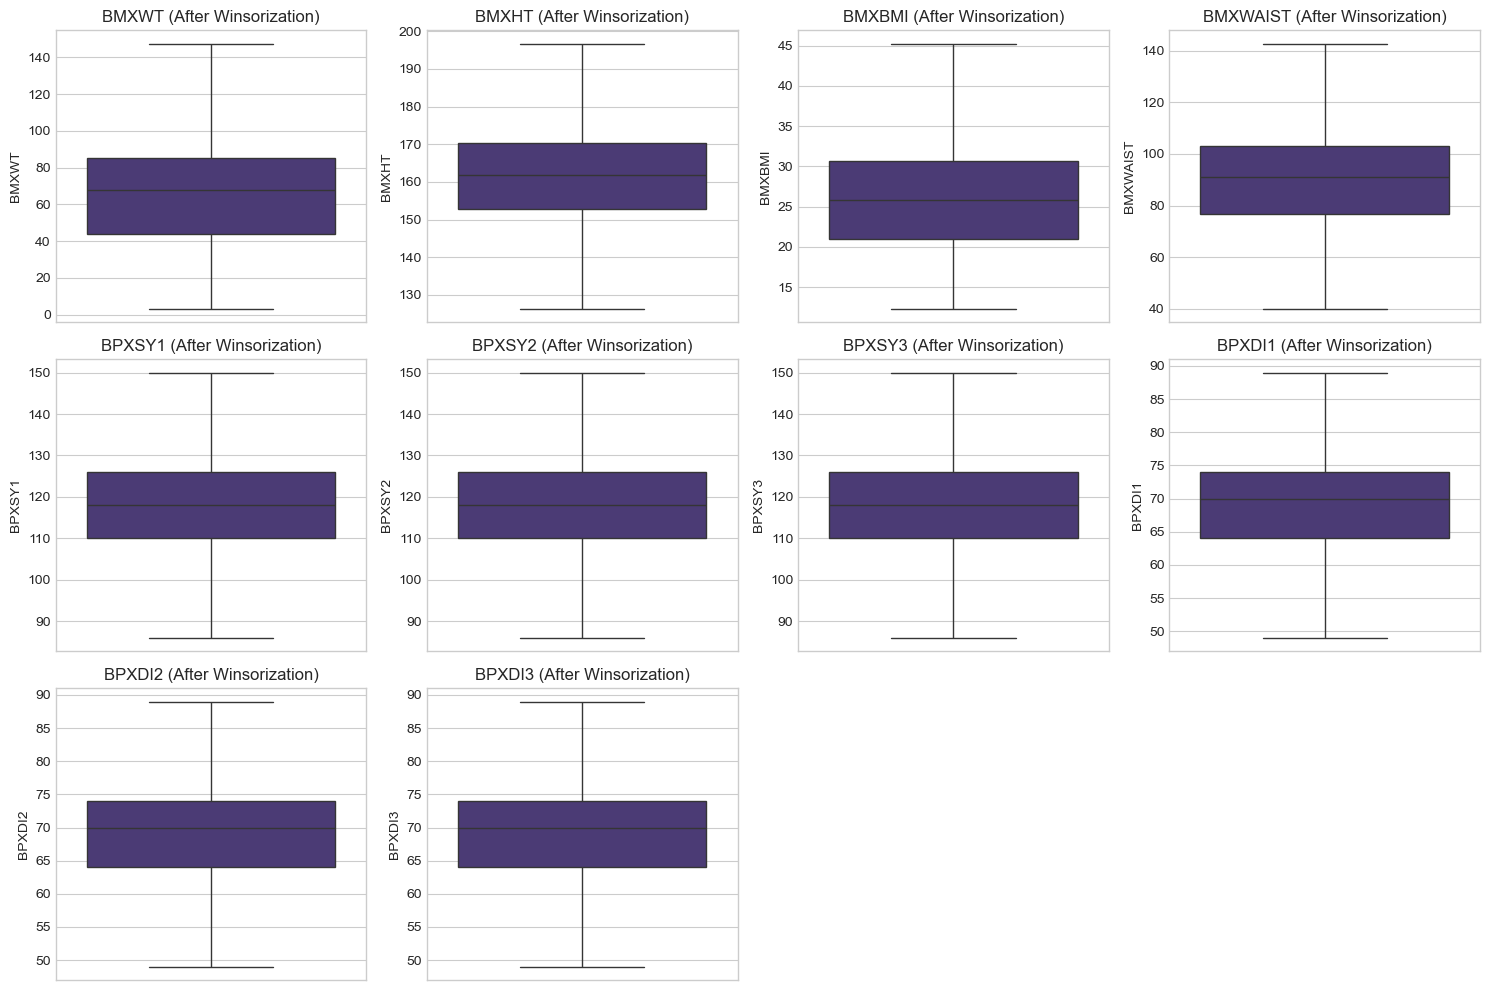

In [ ]:
# Function to detect outliers using the IQR method
def detect_outliers_iqr(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = series[(series < lower_bound) | (series > upper_bound)]
    return outliers, lower_bound, upper_bound

# Function to apply winsorization
def winsorize(series, lower_bound, upper_bound):
    return series.clip(lower=lower_bound, upper=upper_bound)


# Create a copy of the DataFrame to work with
df_clean_outliers = df_clean.copy()

# Variables to check for outliers (excluding age which has natural bounds)
outlier_vars = ['BMXWT', 'BMXHT', 'BMXBMI', 'BMXWAIST', 
                'BPXSY1', 'BPXSY2', 'BPXSY3', 'BPXDI1', 'BPXDI2', 'BPXDI3']

# Detect and handle outliers
for var in outlier_vars:
    # Detect outliers
    outliers, lower_bound, upper_bound = detect_outliers_iqr(df_clean_outliers[var])
    outlier_percentage = (len(outliers) / len(df_clean_outliers)) * 100
    
    print(f"{var}: {len(outliers)} outliers ({outlier_percentage:.2f}%)")
    print(f"  - Lower bound: {lower_bound:.2f}")
    print(f"  - Upper bound: {upper_bound:.2f}")
    
    # Apply winsorization
    df_clean_outliers[var] = winsorize(df_clean_outliers[var], lower_bound, upper_bound)

# Verify outlier handling with box plots
plt.figure(figsize=(15, 10))
for i, var in enumerate(outlier_vars):
    plt.subplot(3, 4, i+1)
    sns.boxplot(y=df_clean_outliers[var])
    plt.title(var + " (After Winsorization)")
plt.tight_layout()
plt.show()

### 2.3 Feature Engineering

Let's create some new features that might be useful for our analysis:

In [21]:
# Create a copy of the DataFrame to work with
df_features = df_clean_outliers.copy()

# 1. Create age groups
age_bins = [0, 18, 40, 65, 100]
age_labels = ['Child/Teen', 'Young Adult', 'Middle-aged', 'Senior']
df_features['age_group'] = pd.cut(df_features['RIDAGEYR'], bins=age_bins, labels=age_labels)

# 2. Create BMI categories according to WHO classification
bmi_bins = [0, 18.5, 25, 30, 100]
bmi_labels = ['Underweight', 'Normal', 'Overweight', 'Obese']
df_features['bmi_category'] = pd.cut(df_features['BMXBMI'], bins=bmi_bins, labels=bmi_labels)

# 3. Calculate average blood pressure from multiple readings
df_features['avg_systolic'] = df_features[['BPXSY1', 'BPXSY2', 'BPXSY3']].mean(axis=1)
df_features['avg_diastolic'] = df_features[['BPXDI1', 'BPXDI2', 'BPXDI3']].mean(axis=1)

# 4. Create hypertension indicator based on average BP
# Using the standard definition: systolic ≥ 130 mmHg or diastolic ≥ 80 mmHg
df_features['hypertension'] = ((df_features['avg_systolic'] >= 130) | (df_features['avg_diastolic'] >= 80)).astype(int)


# 5. Create waist-to-height ratio (WHtR)
df_features['waist_height_ratio'] = df_features['BMXWAIST'] / df_features['BMXHT']


# Display the new features
new_features = ['age_group', 'bmi_category', 'avg_systolic', 'avg_diastolic', 
                'hypertension', 'waist_height_ratio']
df_features[new_features].head()

,age_group,bmi_category,avg_systolic,avg_diastolic,hypertension,waist_height_ratio
0,Child/Teen,Underweight,118.000000,70.000000,0,0.381631
1,Child/Teen,Underweight,118.000000,70.000000,0,0.395883
2,Senior,Obese,128.666667,67.333333,0,0.643083
3,Child/Teen,Normal,111.333333,73.333333,0,0.451338
4,Child/Teen,Underweight,128.000000,52.000000,0,0.404672


### 2.4 Data Transformation

Let's apply some transformations to our numerical variables to make them more suitable for analysis:

In [26]:
# Select numerical variables for transformation
transform_vars = ['BMXWT', 'BMXHT', 'BMXBMI', 'BMXWAIST', 'avg_systolic', 'avg_diastolic',
                  'waist_height_ratio',]

# Create a copy of the DataFrame
df_transformed = df_features.copy()

# 1. Standardization (z-score)
scaler = StandardScaler()
z_cols = [var + '_z' for var in transform_vars]
df_transformed[z_cols] = scaler.fit_transform(df_transformed[transform_vars])

# 2. Min-Max Normalization
min_max_scaler = MinMaxScaler()
norm_cols = [var + '_norm' for var in transform_vars]
df_transformed[norm_cols] = min_max_scaler.fit_transform(df_transformed[transform_vars])


# Display the transformed variables
df_transformed


,SEQN,RIAGENDR,RIDAGEYR,RIDRETH3,DMDEDUC2,INDHHIN2,BMXWT,BMXHT,BMXBMI,BMXWAIST,BPXSY1,BPXSY2,BPXSY3,BPXDI1,BPXDI2,BPXDI3,age_group,bmi_category,avg_systolic,avg_diastolic,hypertension,waist_height_ratio,BMXWT_z,BMXHT_z,BMXBMI_z,BMXWAIST_z,avg_systolic_z,avg_diastolic_z,waist_height_ratio_z,BMXWT_norm,BMXHT_norm,BMXBMI_norm,BMXWAIST_norm,avg_systolic_norm,avg_diastolic_norm,waist_height_ratio_norm
0,93703.0,2.0,2.0,6.0,4.0,15.0,13.7,126.3,17.50,48.2,118.0,118.0,118.0,70.0,70.0,70.0,Child/Teen,Underweight,118.000000,70.000000,0,0.381631,-1.596302,-2.017750,-1.193391,-1.980358,-0.103928,0.074236,-1.666620,0.072816,0.000000,0.157815,0.079815,0.500000,0.525000,0.140837
1,93704.0,1.0,2.0,3.0,4.0,15.0,13.9,126.3,15.70,50.0,118.0,118.0,118.0,70.0,70.0,70.0,Child/Teen,Underweight,118.000000,70.000000,0,0.395883,-1.590080,-2.017750,-1.435705,-1.895118,-0.103928,0.074236,-1.535210,0.074202,0.000000,0.103187,0.097335,0.500000,0.525000,0.163269
2,93705.0,2.0,66.0,4.0,2.0,3.0,79.5,158.3,31.70,101.8,118.0,118.0,150.0,70.0,70.0,62.0,Senior,Obese,128.666667,67.333333,0,0.643083,0.450857,-0.052076,0.718193,0.557893,0.653009,-0.202814,0.744125,0.529126,0.454545,0.588771,0.601533,0.666667,0.458333,0.552368
3,93706.0,1.0,18.0,6.0,4.0,15.0,66.3,175.7,21.50,79.3,112.0,114.0,108.0,74.0,70.0,76.0,Child/Teen,Normal,111.333333,73.333333,0,0.451338,0.040181,1.016760,-0.654917,-0.507604,-0.577013,0.420548,-1.023884,0.437587,0.701705,0.279211,0.382528,0.395833,0.608333,0.250556
4,93707.0,1.0,13.0,7.0,4.0,10.0,45.4,158.4,18.10,64.1,128.0,128.0,128.0,49.0,49.0,58.0,Child/Teen,Underweight,128.000000,52.000000,0,0.404672,-0.610057,-0.045933,-1.112620,-1.227406,0.605701,-1.795851,-1.454171,0.292649,0.455966,0.176024,0.234578,0.656250,0.075000,0.177103
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8699,102952.0,2.0,70.0,6.0,3.0,4.0,49.0,156.5,20.00,82.2,136.0,142.0,140.0,74.0,78.0,68.0,Senior,Normal,139.333333,73.333333,1,0.525240,-0.498054,-0.162645,-0.856845,-0.370273,1.409946,0.420548,-0.342461,0.317614,0.428977,0.233687,0.410756,0.833333,0.608333,0.366880
8700,102953.0,1.0,42.0,1.0,3.0,12.0,97.4,164.9,35.80,114.8,124.0,122.0,116.0,76.0,76.0,74.0,Middle-aged,Obese,120.666667,75.333333,0,0.696180,1.007759,0.353345,1.270129,1.173514,0.085307,0.628336,1.233709,0.653259,0.548295,0.713202,0.728069,0.541667,0.658333,0.635944
8701,102954.0,2.0,41.0,4.0,5.0,10.0,69.1,162.6,26.10,86.4,116.0,118.0,114.0,66.0,72.0,74.0,Middle-aged,Overweight,116.000000,70.666667,0,0.531365,0.127294,0.212062,-0.035671,-0.171380,-0.245853,0.143498,-0.285979,0.457004,0.515625,0.418816,0.451636,0.468750,0.541667,0.376522
8702,102955.0,2.0,14.0,4.0,4.0,9.0,111.9,156.6,45.25,113.5,114.0,114.0,114.0,62.0,60.0,64.0,Child/Teen,Obese,114.000000,62.000000,0,0.724777,1.458880,-0.156502,2.542274,1.111952,-0.387779,-0.756914,1.497391,0.753814,0.430398,1.000000,0.715416,0.437500,0.325000,0.680957


Let's visualize the effect of these transformations on one of our variables:

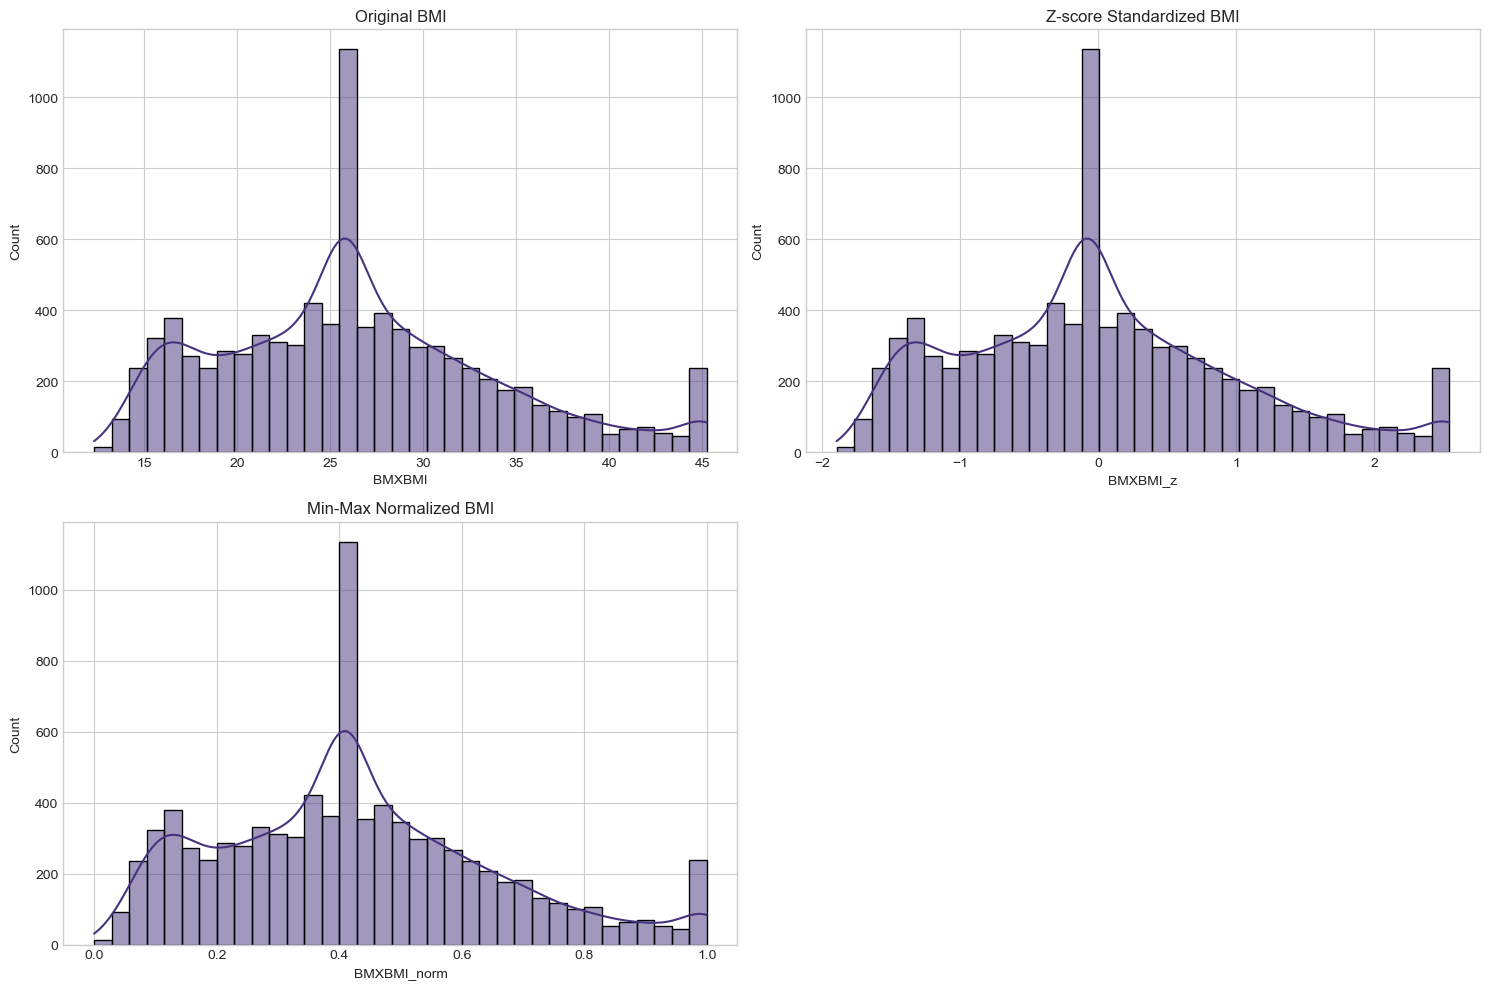

In [27]:
# Visualize the effect of transformations on BMI
plt.figure(figsize=(15, 10))

# Original distribution
plt.subplot(2, 2, 1)
sns.histplot(df_transformed['BMXBMI'], kde=True)
plt.title('Original BMI')

# Z-score standardization
plt.subplot(2, 2, 2)
sns.histplot(df_transformed['BMXBMI_z'], kde=True)
plt.title('Z-score Standardized BMI')

# Min-Max normalization
plt.subplot(2, 2, 3)
sns.histplot(df_transformed['BMXBMI_norm'], kde=True)
plt.title('Min-Max Normalized BMI')


plt.tight_layout()
plt.show()

#### Exercise 4: Log Transformation

Apply a log transformation to variables that have a skewed distribution and visualize the results.

Skewness of numerical variables:
BMXBMI                0.520784
avg_systolic          0.408384
waist_height_ratio    0.340943
BMXWT                 0.013912
BMXWAIST             -0.027908
avg_diastolic        -0.149582
BMXHT                -0.686819
dtype: float64

Variables with high skewness: ['BMXBMI', 'BMXHT']


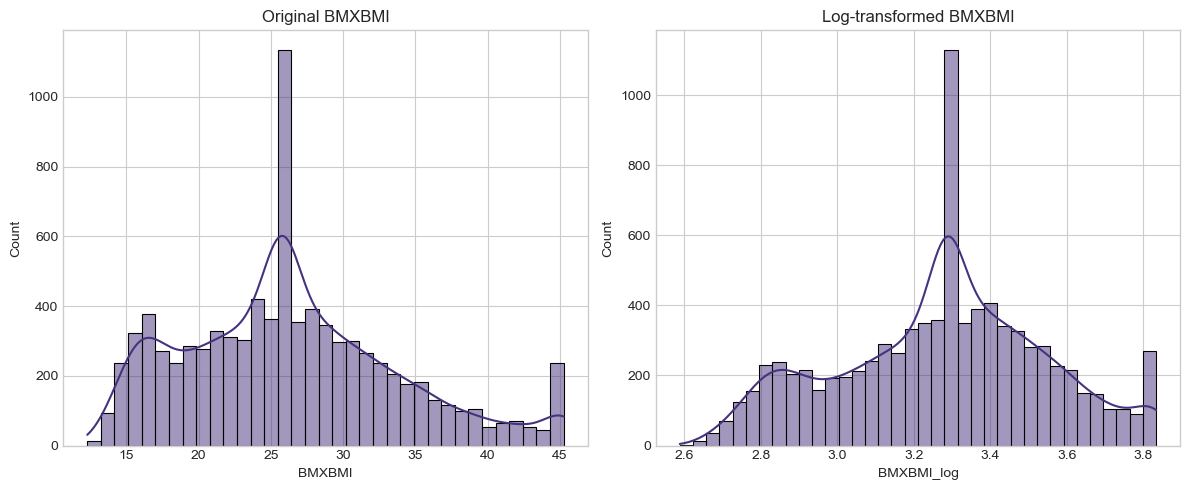

In [28]:
# Your task: Apply log transformation to skewed variables
# Hint: Use np.log1p() to handle zero values

# First, let's check the skewness of our numerical variables
skewness = df_features[transform_vars].skew().sort_values(ascending=False)
print("Skewness of numerical variables:")
print(skewness)

# Identify variables with high skewness (absolute value > 0.5)
skewed_vars = skewness[abs(skewness) > 0.5].index.tolist()
print(f"\nVariables with high skewness: {skewed_vars}")

# Apply log transformation to skewed variables
for var in skewed_vars:
    # Add a small constant (1) before taking log to handle zeros
    df_transformed[var + '_log'] = np.log1p(df_transformed[var])

# Visualize the effect of log transformation on a highly skewed variable
if len(skewed_vars) > 0:
    most_skewed_var = skewed_vars[0]
    
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    sns.histplot(df_transformed[most_skewed_var], kde=True)
    plt.title(f'Original {most_skewed_var}')
    
    plt.subplot(1, 2, 2)
    sns.histplot(df_transformed[most_skewed_var + '_log'], kde=True)
    plt.title(f'Log-transformed {most_skewed_var}')
    
    plt.tight_layout()
    plt.show()

### 2.5 Encoding Categorical Variables

Let's encode our categorical variables to make them suitable for analysis:

In [29]:
# Identify categorical variables
categorical_vars = ['RIAGENDR', 'RIDRETH3', 'DMDEDUC2', 'INDHHIN2', 'age_group', 'bmi_category']

# Create a copy of the DataFrame
df_encoded = df_transformed.copy()

# 1. One-hot encoding for nominal variables
nominal_vars = ['RIDRETH3', 'age_group', 'bmi_category']
df_encoded = pd.get_dummies(df_encoded, columns=nominal_vars, drop_first=True)


# 2. Label encoding for ordinal variables
# For gender: 1=Male, 2=Female -> 0=Male, 1=Female
df_encoded['RIAGENDR'] = df_encoded['RIAGENDR'] - 1

# For education and income, we need to handle missing values and create meaningful ordinal encoding
# Education (DMDEDUC2): Higher values generally indicate more education
# Income (INDHHIN2): Higher values generally indicate higher income
# We'll keep these as they are for simplicity, but in a real analysis you might want to recode them

# Display the encoded DataFrame
print("Encoded DataFrame shape:", df_encoded.shape)
df_encoded.head()

Encoded DataFrame shape: (8704, 46)


,SEQN,RIAGENDR,RIDAGEYR,DMDEDUC2,INDHHIN2,BMXWT,BMXHT,BMXBMI,BMXWAIST,BPXSY1,BPXSY2,BPXSY3,BPXDI1,BPXDI2,BPXDI3,avg_systolic,avg_diastolic,hypertension,waist_height_ratio,BMXWT_z,BMXHT_z,BMXBMI_z,BMXWAIST_z,avg_systolic_z,avg_diastolic_z,waist_height_ratio_z,BMXWT_norm,BMXHT_norm,BMXBMI_norm,BMXWAIST_norm,avg_systolic_norm,avg_diastolic_norm,waist_height_ratio_norm,BMXBMI_log,BMXHT_log,RIDRETH3_2.0,RIDRETH3_3.0,RIDRETH3_4.0,RIDRETH3_6.0,RIDRETH3_7.0,age_group_Young Adult,age_group_Middle-aged,age_group_Senior,bmi_category_Normal,bmi_category_Overweight,bmi_category_Obese
0,93703.0,1.0,2.0,4.0,15.0,13.7,126.3,17.5,48.2,118.0,118.0,118.0,70.0,70.0,70.0,118.000000,70.000000,0,0.381631,-1.596302,-2.017750,-1.193391,-1.980358,-0.103928,0.074236,-1.666620,0.072816,0.000000,0.157815,0.079815,0.500000,0.525000,0.140837,2.917771,4.846547,False,False,False,True,False,False,False,False,False,False,False
1,93704.0,0.0,2.0,4.0,15.0,13.9,126.3,15.7,50.0,118.0,118.0,118.0,70.0,70.0,70.0,118.000000,70.000000,0,0.395883,-1.590080,-2.017750,-1.435705,-1.895118,-0.103928,0.074236,-1.535210,0.074202,0.000000,0.103187,0.097335,0.500000,0.525000,0.163269,2.815409,4.846547,False,True,False,False,False,False,False,False,False,False,False
2,93705.0,1.0,66.0,2.0,3.0,79.5,158.3,31.7,101.8,118.0,118.0,150.0,70.0,70.0,62.0,128.666667,67.333333,0,0.643083,0.450857,-0.052076,0.718193,0.557893,0.653009,-0.202814,0.744125,0.529126,0.454545,0.588771,0.601533,0.666667,0.458333,0.552368,3.487375,5.070789,False,False,True,False,False,False,False,True,False,False,True
3,93706.0,0.0,18.0,4.0,15.0,66.3,175.7,21.5,79.3,112.0,114.0,108.0,74.0,70.0,76.0,111.333333,73.333333,0,0.451338,0.040181,1.016760,-0.654917,-0.507604,-0.577013,0.420548,-1.023884,0.437587,0.701705,0.279211,0.382528,0.395833,0.608333,0.250556,3.113515,5.174453,False,False,False,True,False,False,False,False,True,False,False
4,93707.0,0.0,13.0,4.0,10.0,45.4,158.4,18.1,64.1,128.0,128.0,128.0,49.0,49.0,58.0,128.000000,52.000000,0,0.404672,-0.610057,-0.045933,-1.112620,-1.227406,0.605701,-1.795851,-1.454171,0.292649,0.455966,0.176024,0.234578,0.656250,0.075000,0.177103,2.949688,5.071417,False,False,False,False,True,False,False,False,False,False,False


## Part 3: Exploratory Data Analysis (EDA)

Now that we have preprocessed our data, let's explore it to gain insights.

### 3.1 Summary Statistics

In [31]:
# Calculate summary statistics for numerical variables
numerical_vars = ['RIDAGEYR', 'BMXWT', 'BMXHT', 'BMXBMI', 'BMXWAIST', 
                  'avg_systolic', 'avg_diastolic']

summary_stats = df_encoded[numerical_vars].describe().T

summary_stats

,count,mean,std,min,25%,50%,75%,max
RIDAGEYR,8704.0,34.438649,25.379037,5.397605e-79,11.000000,31.00,58.000000,80.0000
BMXWT,8704.0,65.008513,32.143951,3.200000e+00,43.900000,67.75,85.300000,147.4000
BMXHT,8704.0,159.147760,16.280332,1.263000e+02,152.700000,161.90,170.300000,196.7000
BMXBMI,8704.0,26.364982,7.428822,1.230000e+01,21.000000,25.80,30.700000,45.2500
BMXWAIST,8704.0,90.019021,21.118118,4.000000e+01,76.675000,91.20,103.100000,142.7375
avg_systolic,8704.0,119.464537,14.092690,8.600000e+01,110.666667,118.00,126.666667,150.0000
avg_diastolic,8704.0,69.285463,9.625775,4.900000e+01,64.000000,70.00,74.666667,89.0000


Let's also look at the distribution of our categorical variables:

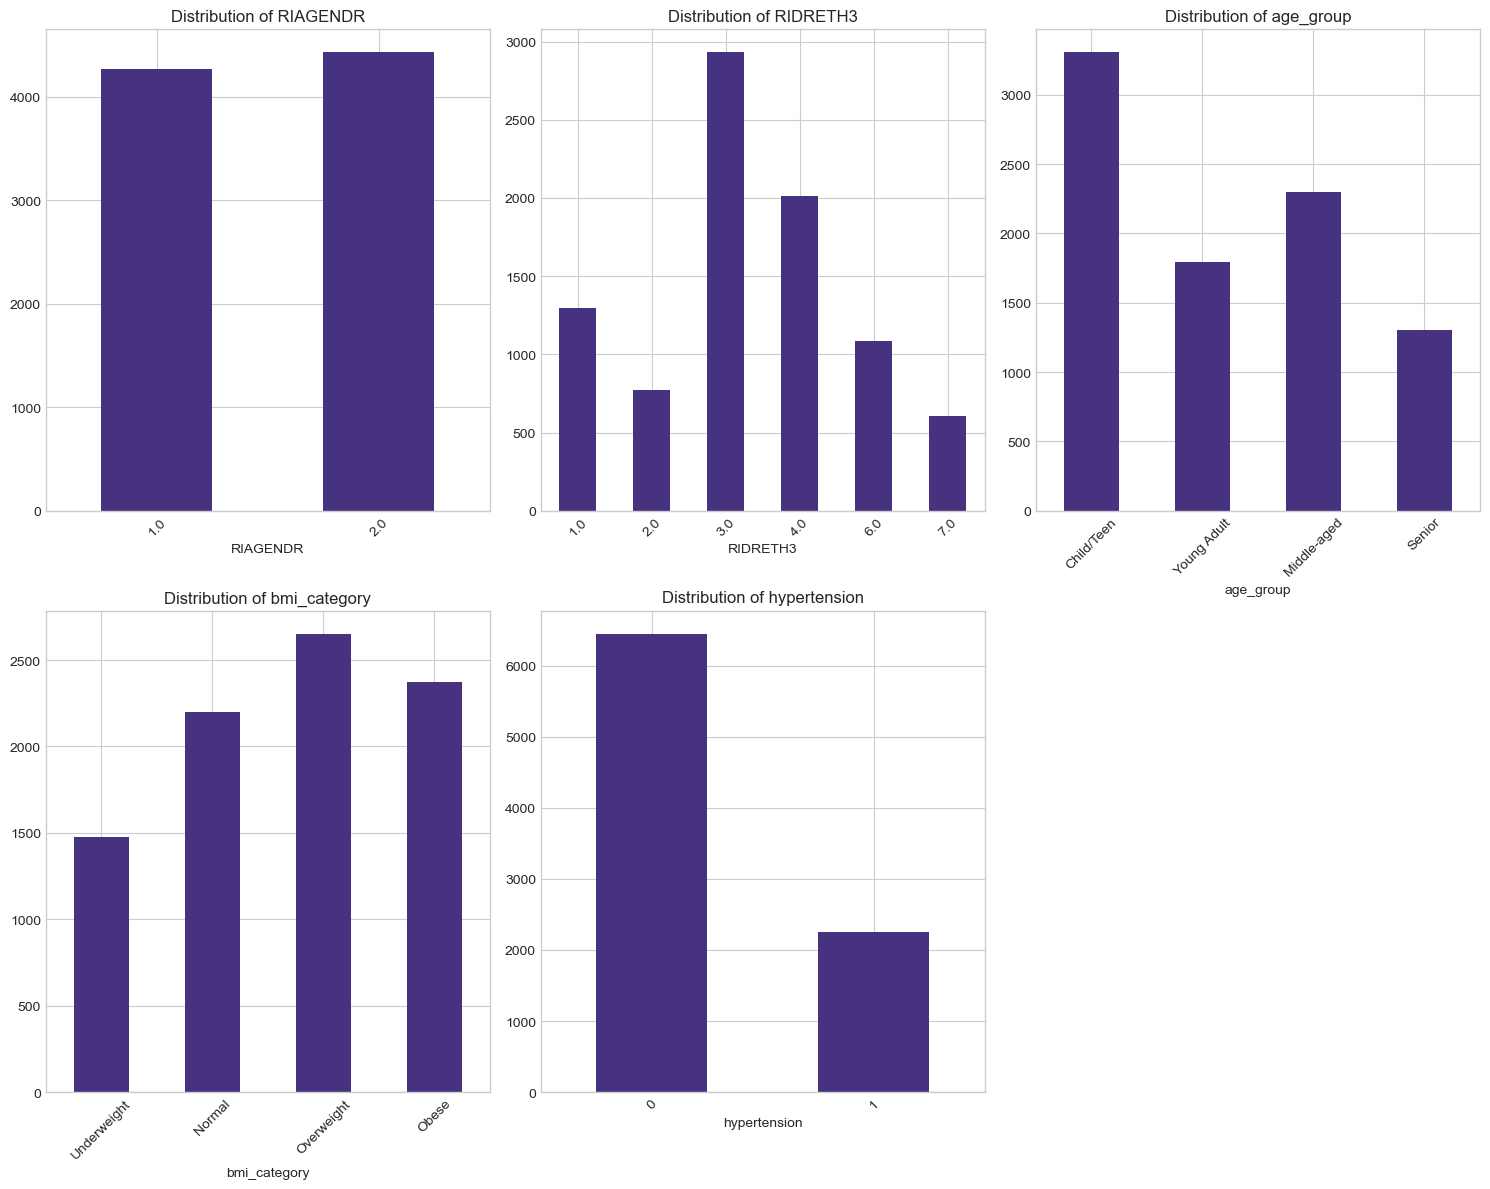

In [32]:
# Distribution of categorical variables
categorical_vars = ['RIAGENDR', 'RIDRETH3', 'age_group', 'bmi_category', 'hypertension']

plt.figure(figsize=(15, 12))
for i, var in enumerate(categorical_vars):
    plt.subplot(2, 3, i+1)
    value_counts = df_features[var].value_counts().sort_index()
    value_counts.plot(kind='bar')
    plt.title(f'Distribution of {var}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 3.2 Correlation Analysis

Let's examine the correlations between our numerical variables:

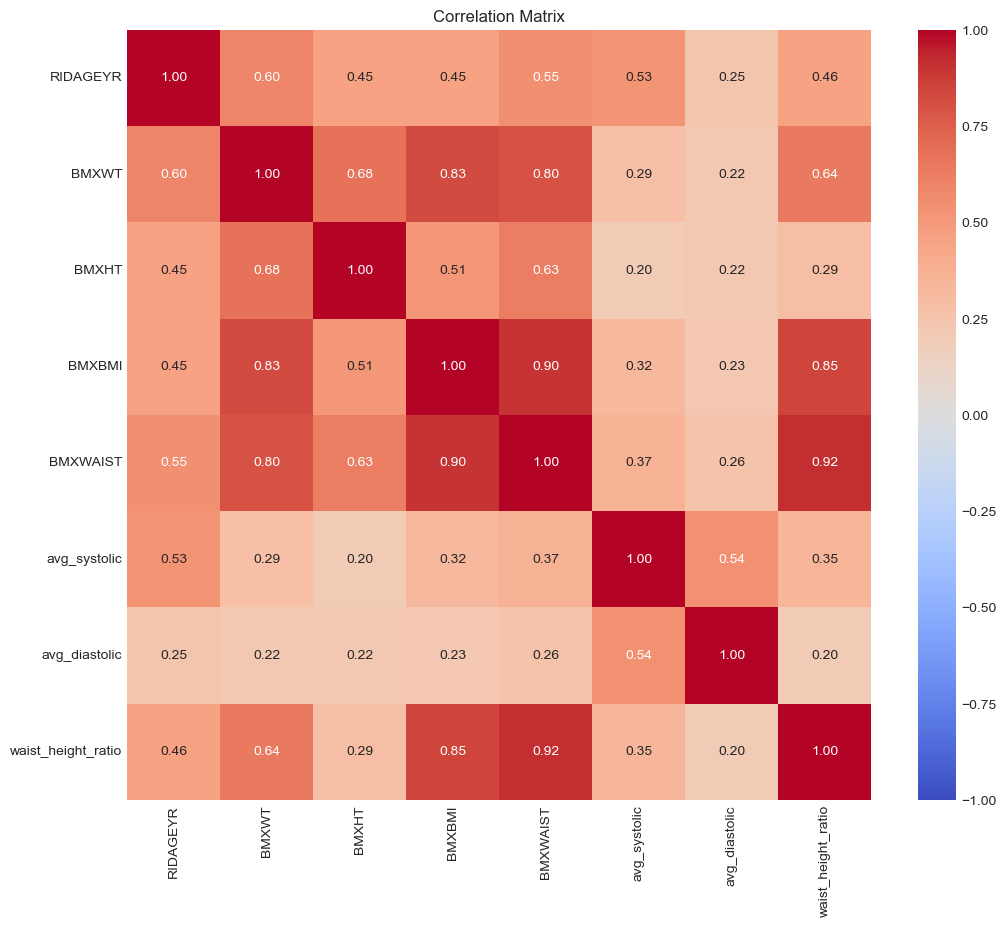

In [34]:
# Select numerical variables for correlation analysis
corr_vars = ['RIDAGEYR', 'BMXWT', 'BMXHT', 'BMXBMI', 'BMXWAIST', 
             'avg_systolic', 'avg_diastolic',
             'waist_height_ratio']

# Calculate correlation matrix
corr_matrix = df_encoded[corr_vars].corr()


# Visualize correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

#### Correlation Analysis

Identify the strongest correlations in the dataset and create scatter plots to visualize these relationships.

Top 10 strongest correlations:
waist_height_ratio  BMXWAIST              0.921439
BMXWAIST            waist_height_ratio    0.921439
BMXBMI              BMXWAIST              0.901990
BMXWAIST            BMXBMI                0.901990
BMXBMI              waist_height_ratio    0.850576
waist_height_ratio  BMXBMI                0.850576
BMXBMI              BMXWT                 0.827375
BMXWT               BMXBMI                0.827375
                    BMXWAIST              0.801524
BMXWAIST            BMXWT                 0.801524
dtype: float64


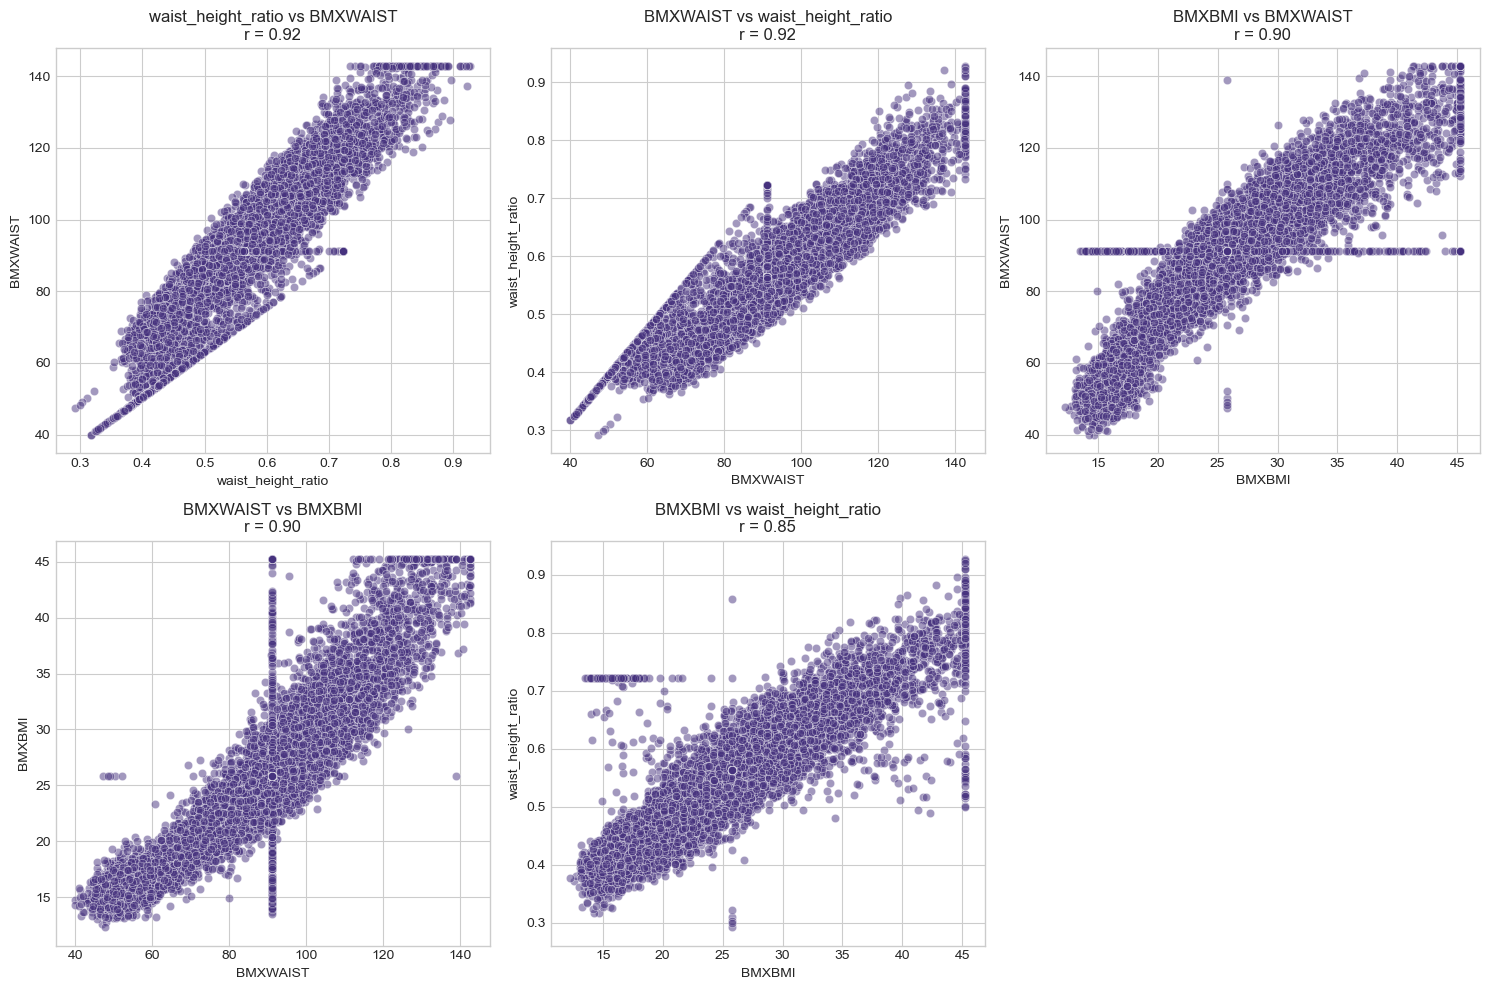

In [ ]:
# Get the absolute correlation values and sort them
corr_pairs = corr_matrix.unstack()
corr_pairs = corr_pairs[corr_pairs < 1.0]  # Remove self-correlations (diagonal)
corr_pairs = corr_pairs.abs().sort_values(ascending=False)

# Display the top 10 strongest correlations
print("Top 10 strongest correlations:")
print(corr_pairs.head(10))

# Extract the top 5 pairs for visualization
top_pairs = corr_pairs.head(5).index.tolist()


# Create scatter plots for the top 5 correlated pairs
plt.figure(figsize=(15, 10))
for i, (var1, var2) in enumerate(top_pairs):
    plt.subplot(2, 3, i+1)
    sns.scatterplot(x=df_features[var1], y=df_features[var2], alpha=0.5)
    plt.title(f'{var1} vs {var2}\nr = {corr_matrix.loc[var1, var2]:.2f}')
    plt.xlabel(var1)
    plt.ylabel(var2)
plt.tight_layout()
plt.show()

### 3.3 Group Analysis

Let's analyze how key health metrics vary across different demographic groups:

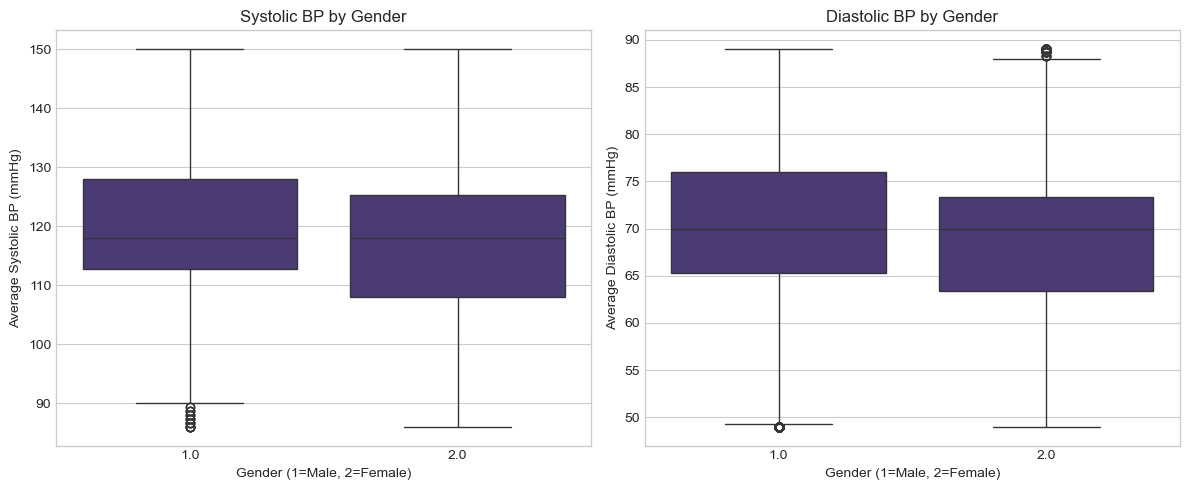

In [36]:
# 1. Blood pressure by gender
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x='RIAGENDR', y='avg_systolic', data=df_features)
plt.title('Systolic BP by Gender')
plt.xlabel('Gender (1=Male, 2=Female)')
plt.ylabel('Average Systolic BP (mmHg)')

plt.subplot(1, 2, 2)
sns.boxplot(x='RIAGENDR', y='avg_diastolic', data=df_features)
plt.title('Diastolic BP by Gender')
plt.xlabel('Gender (1=Male, 2=Female)')
plt.ylabel('Average Diastolic BP (mmHg)')

plt.tight_layout()
plt.show()

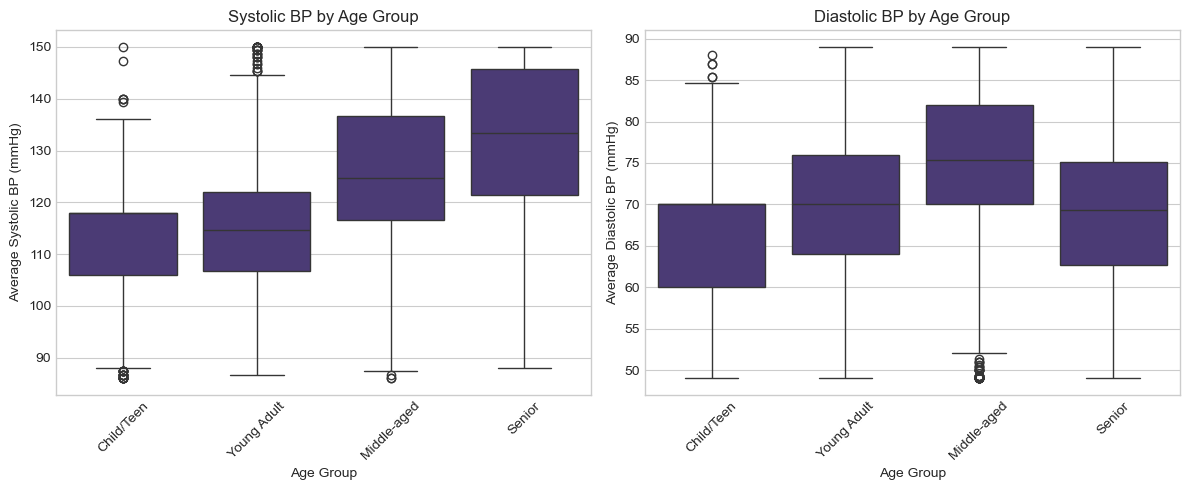

In [37]:
# 2. Blood pressure by age group
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x='age_group', y='avg_systolic', data=df_features)
plt.title('Systolic BP by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Systolic BP (mmHg)')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.boxplot(x='age_group', y='avg_diastolic', data=df_features)
plt.title('Diastolic BP by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Diastolic BP (mmHg)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

#### Group Analysis


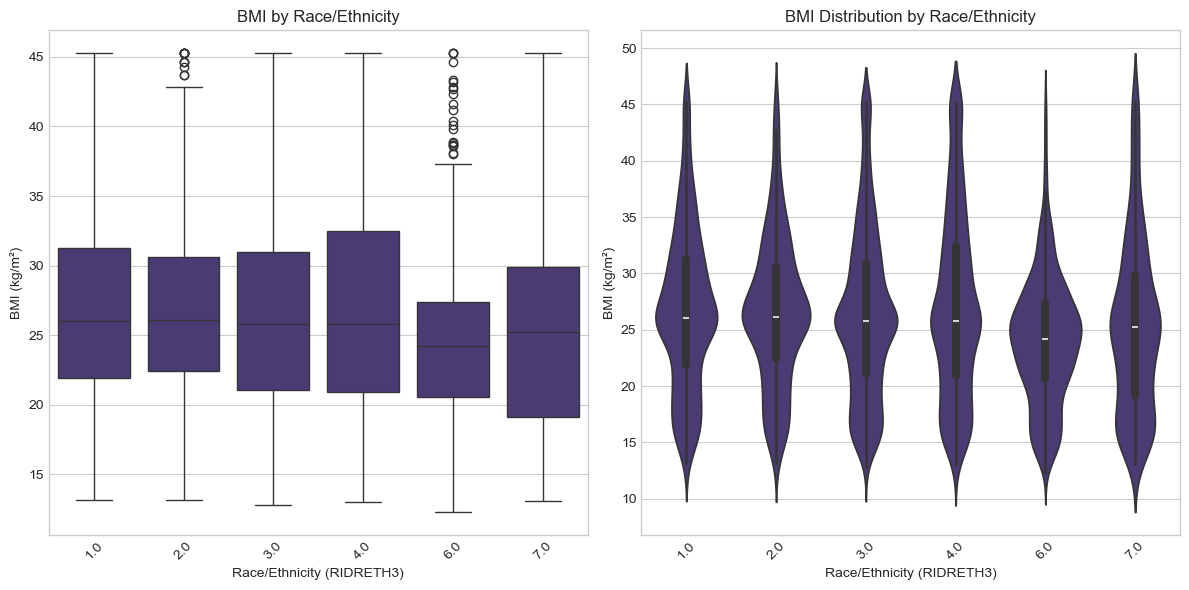

C:\Users\dorsa\AppData\Local\Temp\ipykernel_23600\49080490.py:34: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(x='age_group', y='waist_height_ratio', hue='RIAGENDR', data=df_features, ci=95)


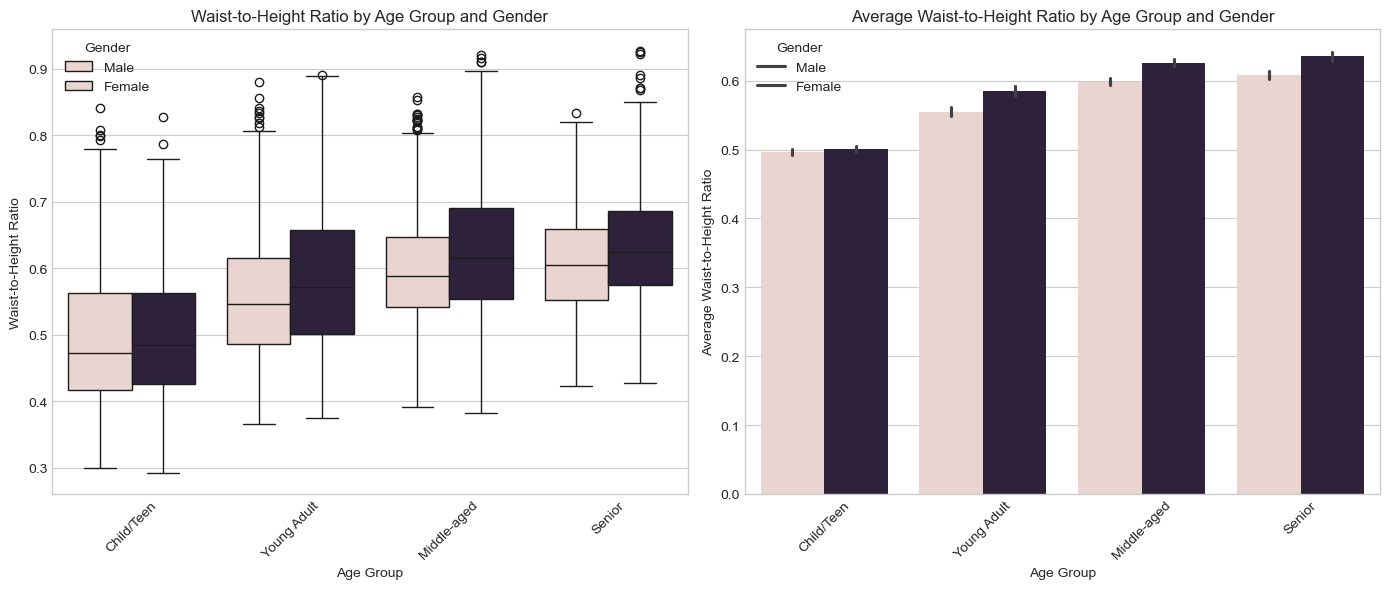

In [ ]:
# 1. BMI distribution by race/ethnicity
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x='RIDRETH3', y='BMXBMI', data=df_features)
plt.title('BMI by Race/Ethnicity')
plt.xlabel('Race/Ethnicity (RIDRETH3)')
plt.ylabel('BMI (kg/m²)')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.violinplot(x='RIDRETH3', y='BMXBMI', data=df_features)
plt.title('BMI Distribution by Race/Ethnicity')
plt.xlabel('Race/Ethnicity (RIDRETH3)')
plt.ylabel('BMI (kg/m²)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# 2. Waist-to-height ratio by gender and age group
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x='age_group', y='waist_height_ratio', hue='RIAGENDR', data=df_features)
plt.title('Waist-to-Height Ratio by Age Group and Gender')
plt.xlabel('Age Group')
plt.ylabel('Waist-to-Height Ratio')
plt.legend(title='Gender', labels=['Male', 'Female'])
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.barplot(x='age_group', y='waist_height_ratio', hue='RIAGENDR', data=df_features, ci=95)
plt.title('Average Waist-to-Height Ratio by Age Group and Gender')
plt.xlabel('Age Group')
plt.ylabel('Average Waist-to-Height Ratio')
plt.legend(title='Gender', labels=['Male', 'Female'])
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


### 3.4 Distribution Analysis

Let's examine the distributions of our key health metrics and check for normality:

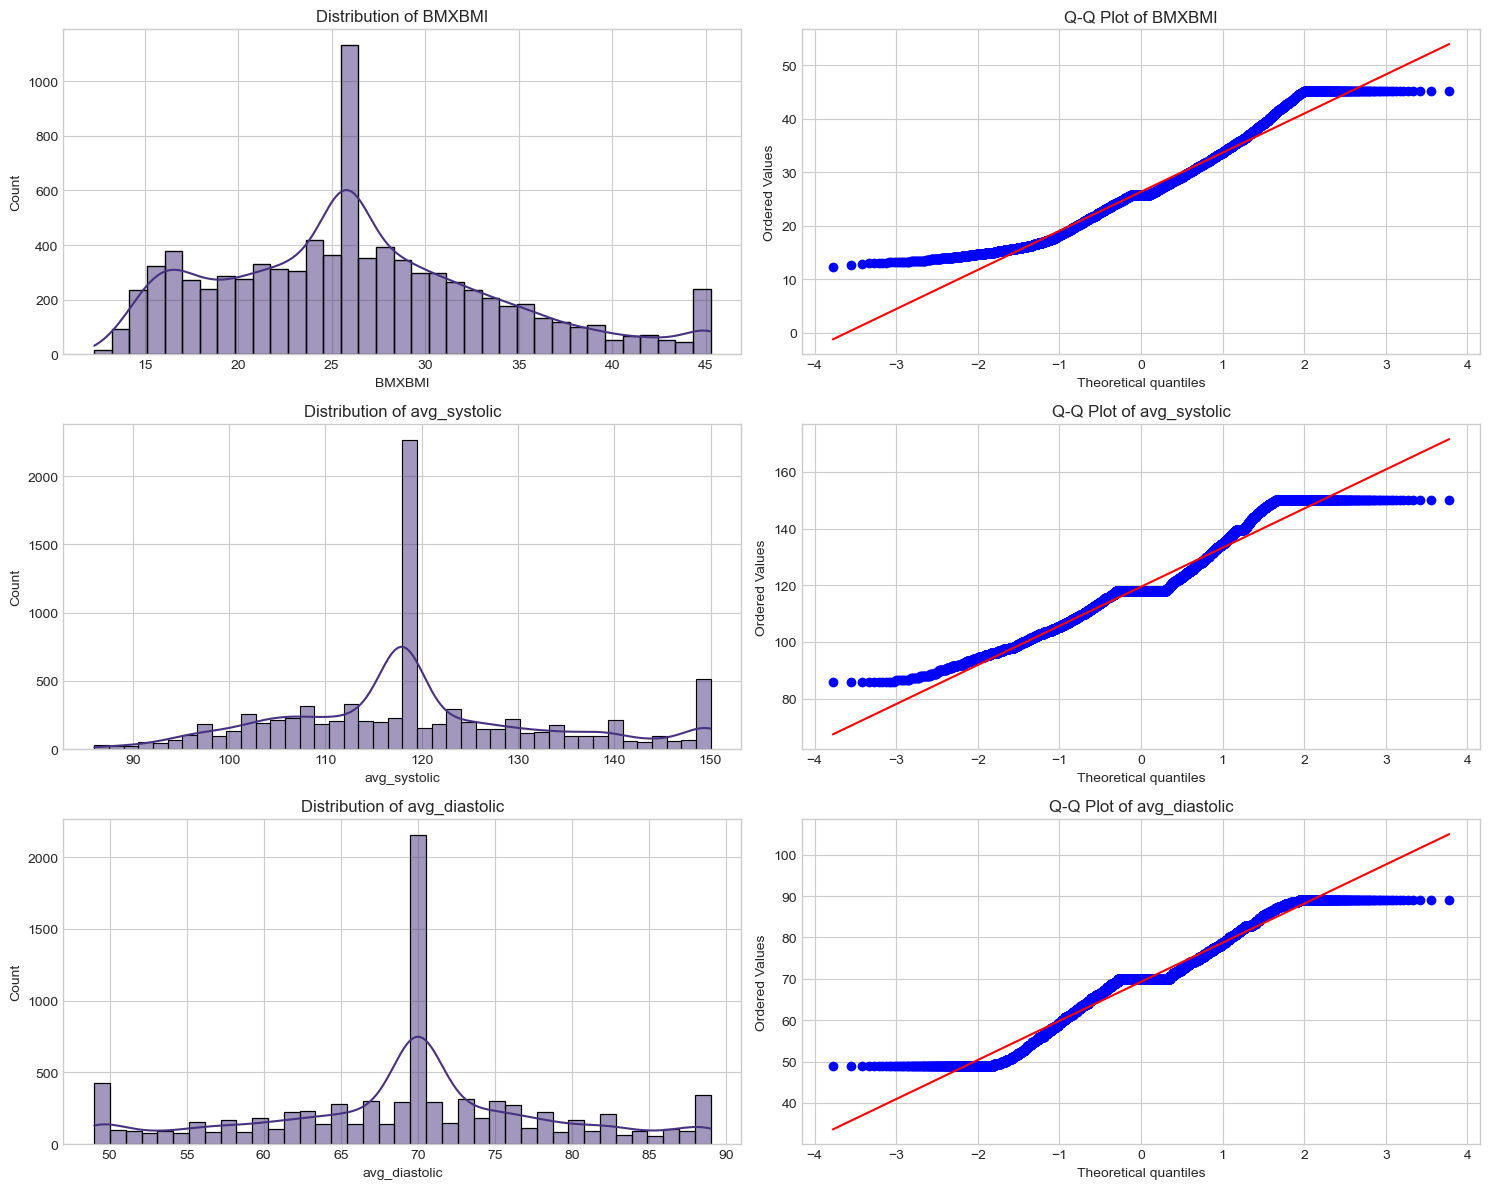

In [41]:
# Select variables for distribution analysis
dist_vars = ['BMXBMI', 'avg_systolic', 'avg_diastolic',]

# Create histograms and Q-Q plots
plt.figure(figsize=(15, 12))
for i, var in enumerate(dist_vars):
    # Histogram
    plt.subplot(len(dist_vars), 2, 2*i+1)
    sns.histplot(df_features[var], kde=True)
    plt.title(f'Distribution of {var}')
    
    # Q-Q plot
    plt.subplot(len(dist_vars), 2, 2*i+2)
    stats.probplot(df_features[var], dist="norm", plot=plt)
    plt.title(f'Q-Q Plot of {var}')
    
plt.tight_layout()
plt.show()

In [42]:
# Perform Shapiro-Wilk test for normality
for var in dist_vars:
    # Take a random sample if dataset is large (Shapiro-Wilk works best with n < 5000)
    if len(df_features) > 5000:
        data = df_features[var].sample(5000, random_state=42)
    else:
        data = df_features[var]
    
    # Perform Shapiro-Wilk test
    stat, p_value = stats.shapiro(data)
    print(f"{var}: Shapiro-Wilk test statistic = {stat:.4f}, p-value = {p_value:.4e}")
    
    # Interpret the result
    alpha = 0.05
    if p_value < alpha:
        print(f"  The distribution of {var} is significantly different from normal (reject H0)")
    else:
        print(f"  The distribution of {var} is not significantly different from normal (fail to reject H0)")
    print()

BMXBMI: Shapiro-Wilk test statistic = 0.9684, p-value = 8.1207e-32
  The distribution of BMXBMI is significantly different from normal (reject H0)

avg_systolic: Shapiro-Wilk test statistic = 0.9590, p-value = 2.1463e-35
  The distribution of avg_systolic is significantly different from normal (reject H0)

avg_diastolic: Shapiro-Wilk test statistic = 0.9632, p-value = 6.9464e-34
  The distribution of avg_diastolic is significantly different from normal (reject H0)



## Part 4: Basic Hypothesis Testing

Now, let's perform some hypothesis tests to answer research questions about our data.

### 4.1  Is there a significant difference in systolic blood pressure between males and females?

In [43]:
# Extract data for each group
male_bp = df_features[df_features['RIAGENDR'] == 1]['avg_systolic']
female_bp = df_features[df_features['RIAGENDR'] == 2]['avg_systolic']

# Display summary statistics
print("Male systolic BP:")
print(f"  Mean: {male_bp.mean():.2f} mmHg")
print(f"  Std Dev: {male_bp.std():.2f} mmHg")
print(f"  N: {len(male_bp)}")
print()
print("Female systolic BP:")
print(f"  Mean: {female_bp.mean():.2f} mmHg")
print(f"  Std Dev: {female_bp.std():.2f} mmHg")
print(f"  N: {len(female_bp)}")
print()

# Check normality assumptions
# We already did this in the distribution analysis section
# Since our sample size is large, we can rely on the Central Limit Theorem

# Perform independent samples t-test
t_stat, p_value = stats.ttest_ind(male_bp, female_bp, equal_var=False)  # Using Welch's t-test
print(f"Welch's t-test: t-statistic = {t_stat:.4f}, p-value = {p_value:.4e}")

# Interpret the result
alpha = 0.05
if p_value < alpha:
    print("There is a significant difference in systolic BP between males and females (reject H0)")
else:
    print("There is no significant difference in systolic BP between males and females (fail to reject H0)")

# Calculate effect size (Cohen's d)
def cohens_d(group1, group2):
    n1, n2 = len(group1), len(group2)
    mean1, mean2 = group1.mean(), group2.mean()
    var1, var2 = group1.var(), group2.var()
    # Pooled standard deviation
    pooled_std = np.sqrt(((n1 - 1) * var1 + (n2 - 1) * var2) / (n1 + n2 - 2))
    # Cohen's d
    d = (mean1 - mean2) / pooled_std
    return d

d = cohens_d(male_bp, female_bp)
print(f"Cohen's d: {d:.4f}")

# Interpret effect size
if abs(d) < 0.2:
    print("The effect size is small")
elif abs(d) < 0.5:
    print("The effect size is medium")
else:
    print("The effect size is large")

Male systolic BP:
  Mean: 120.39 mmHg
  Std Dev: 13.48 mmHg
  N: 4273

Female systolic BP:
  Mean: 118.57 mmHg
  Std Dev: 14.61 mmHg
  N: 4431

Welch's t-test: t-statistic = 6.0653, p-value = 1.3718e-09
There is a significant difference in systolic BP between males and females (reject H0)
Cohen's d: 0.1299
The effect size is small


### 4.2 Is there an association between BMI category and hypertension?

Contingency Table (BMI Category vs. Hypertension):
hypertension     0     1
bmi_category            
Underweight   1447    29
Normal        1737   464
Overweight    1905   747
Obese         1358  1017

Row Percentages (% with hypertension within each BMI category):
hypertension          0          1
bmi_category                      
Underweight   98.035230   1.964770
Normal        78.918673  21.081327
Overweight    71.832579  28.167421
Obese         57.178947  42.821053



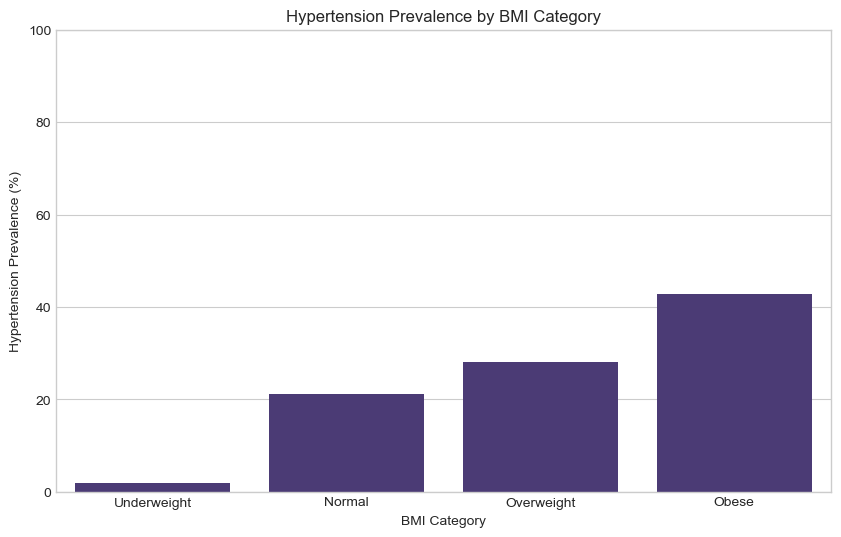

Chi-square test: chi2 = 828.0160, p-value = 3.6315e-179, degrees of freedom = 3
There is a significant association between BMI category and hypertension (reject H0)
Cramer's V: 0.3079
The effect size is medium


In [44]:
# Create contingency table
contingency_table = pd.crosstab(df_features['bmi_category'], df_features['hypertension'])
print("Contingency Table (BMI Category vs. Hypertension):")
print(contingency_table)
print()

# Calculate row percentages
row_percentages = contingency_table.div(contingency_table.sum(axis=1), axis=0) * 100
print("Row Percentages (% with hypertension within each BMI category):")
print(row_percentages)
print()

# Visualize the relationship
plt.figure(figsize=(10, 6))
sns.barplot(x=row_percentages.index, y=row_percentages[1])
plt.title('Hypertension Prevalence by BMI Category')
plt.xlabel('BMI Category')
plt.ylabel('Hypertension Prevalence (%)')
plt.ylim(0, 100)
plt.show()

# Perform Chi-square test
chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)
print(f"Chi-square test: chi2 = {chi2:.4f}, p-value = {p_value:.4e}, degrees of freedom = {dof}")

# Interpret the result
alpha = 0.05
if p_value < alpha:
    print("There is a significant association between BMI category and hypertension (reject H0)")
else:
    print("There is no significant association between BMI category and hypertension (fail to reject H0)")

# Calculate Cramer's V (effect size for chi-square)
def cramers_v(contingency_table):
    chi2 = stats.chi2_contingency(contingency_table)[0]
    n = contingency_table.sum().sum()
    phi2 = chi2 / n
    r, k = contingency_table.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

v = cramers_v(contingency_table)
print(f"Cramer's V: {v:.4f}")

# Interpret effect size
if v < 0.1:
    print("The effect size is negligible")
elif v < 0.3:
    print("The effect size is small")
elif v < 0.5:
    print("The effect size is medium")
else:
    print("The effect size is large")